In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error
from helper_functions import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Reading in data

train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Making a list, since there are a lot of columns that aren't visible otherwise
list(zip(train.isna().sum().index,train.isna().sum().values))


[('MSSubClass', 0),
 ('MSZoning', 0),
 ('LotFrontage', 259),
 ('LotArea', 0),
 ('Street', 0),
 ('Alley', 1369),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 0),
 ('Exterior2nd', 0),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtExposure', 38),
 ('BsmtFinType1', 37),
 ('BsmtFinSF1', 0),
 ('BsmtFinType2', 38),
 ('BsmtFinSF2', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 1),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 0),
 ('BsmtHalfBath', 0),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAb

## Part 1: CatBoost model with basic value filling

In [6]:
train_df = basic_filling(train)
test_df = basic_filling(test)

In [7]:
# Making a list, since there are a lot of columns that aren't visible otherwise
list(zip(train_df.isna().sum().index,train_df.isna().sum().values))

[('MSSubClass', 0),
 ('MSZoning', 0),
 ('LotFrontage', 0),
 ('LotArea', 0),
 ('Street', 0),
 ('Alley', 0),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 0),
 ('Exterior2nd', 0),
 ('MasVnrType', 0),
 ('MasVnrArea', 0),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 0),
 ('BsmtCond', 0),
 ('BsmtExposure', 0),
 ('BsmtFinType1', 0),
 ('BsmtFinSF1', 0),
 ('BsmtFinType2', 0),
 ('BsmtFinSF2', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 0),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 0),
 ('BsmtHalfBath', 0),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAbvGr', 0),


In [8]:
## Setting Categorical and Numeric Features to be used in CatBoost algo
cat_features = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
               'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
               'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
               'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
               'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
num_features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
               'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
               'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
               'Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
               '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice'
               ]

# Removing some features with a lot of missing values
# cat_features.remove('FireplaceQu')
# cat_features.remove('PoolQC')
# cat_features.remove('Fence')
# cat_features.remove('MiscFeature')

# num_features.remove('LotFrontage')


In [9]:
# Setting my input and target data
X = train_df.drop('SalePrice',axis=1)
y = np.log1p(train_df.SalePrice) # Setting this to log10, since that is how scoring occurs

In [10]:
from catboost import CatBoostRegressor, Pool, cv

model = CatBoostRegressor(verbose=False)

# Creating pool dataset to pass into catboost model
catboost_pool_train = Pool(data=X,label=y,cat_features=cat_features)

In [11]:
# Doing cross validation to see where the model generalizes the best. It appears that ~150-200 iterations generlizes best.
# Will try to submit with 200 and 1000 to compare scores
# With a depth of 10 instead of 5, we get much closer train and validation RMSE, which means that...
# depth of 5 is not high enough to properly train
params = {"iterations": 200,
          "depth": 10,
          "loss_function": "RMSE",
          "eval_metric": "RMSE",
          "verbose": False}

scores = cv(catboost_pool_train,
            params,
            fold_count=3,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 0.3534116715
bestIteration = 199

Training on fold [1/3]

bestTest = 0.4238780836
bestIteration = 199

Training on fold [2/3]

bestTest = 0.2568766421
bestIteration = 199



In [12]:
model = CatBoostRegressor(**params)

model.fit(catboost_pool_train)

In [13]:
catboost_pool_test = Pool(data=test_df,cat_features=cat_features)

In [14]:
# Submitting with all features and varies iterations. Eventhough 1000 iterations is wiidly overfit,
# it performs the best
preds = model.predict(catboost_pool_test)

preds = np.expm1(preds)

pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_log_target_200_it.csv',index=False)


# catboost_submission_log_target_1000_it.csv - Score: 0.13508
# catboost_submission_log_target_150_it.csv - Score: 0.13931
# catboost_submission_log_target_200_it.csv - Score: 0.13762 - 0.13746 w/ new features

## Part 2a: CatBoost model with GridSearch - Look at randomized search to optimize values

In [21]:
# Basic grid search to set optimized model parameters

model = CatBoostRegressor(thread_count=4,od_type='Iter',od_wait=100) # Setting the overfit params as the large iter models do not get better

grid = {'iterations': list(range(100,5000)),
        'learning_rate': list(np.linspace(0,2,21)),
        'depth': list(range(2,12)),
        'l2_leaf_reg': list(range(2,31)),
        'bagging_temperature': np.linspace(0.0, 1.0,11)}

# model.grid_search(grid, catboost_pool_train,plot=True)

model.randomized_search(grid,catboost_pool_train,n_iter=50)

0:	learn: 10.8266120	test: 10.8621980	best: 10.8621980 (0)	total: 14.7ms	remaining: 14.7s
1:	learn: 9.7475936	test: 9.7891327	best: 9.7891327 (1)	total: 16.7ms	remaining: 8.33s
2:	learn: 8.7770411	test: 8.8169735	best: 8.8169735 (2)	total: 18.5ms	remaining: 6.14s
3:	learn: 7.9033664	test: 7.9425409	best: 7.9425409 (3)	total: 20.4ms	remaining: 5.07s
4:	learn: 7.1170943	test: 7.1554475	best: 7.1554475 (4)	total: 24.9ms	remaining: 4.95s
5:	learn: 6.4089146	test: 6.4494639	best: 6.4494639 (5)	total: 27.2ms	remaining: 4.51s
6:	learn: 5.7721243	test: 5.8132956	best: 5.8132956 (6)	total: 28.7ms	remaining: 4.07s
7:	learn: 5.1983621	test: 5.2395418	best: 5.2395418 (7)	total: 30.2ms	remaining: 3.74s
8:	learn: 4.6827576	test: 4.7241382	best: 4.7241382 (8)	total: 31.6ms	remaining: 3.48s
9:	learn: 4.2183168	test: 4.2597893	best: 4.2597893 (9)	total: 33.1ms	remaining: 3.28s
10:	learn: 3.8006810	test: 3.8442731	best: 3.8442731 (10)	total: 34.6ms	remaining: 3.11s
11:	learn: 3.4246304	test: 3.4653968	b

122:	learn: 0.1321144	test: 0.2408699	best: 0.2408699 (122)	total: 216ms	remaining: 1.54s
123:	learn: 0.1319273	test: 0.2408839	best: 0.2408699 (122)	total: 219ms	remaining: 1.54s
124:	learn: 0.1317976	test: 0.2392135	best: 0.2392135 (124)	total: 224ms	remaining: 1.57s
125:	learn: 0.1313747	test: 0.2388665	best: 0.2388665 (125)	total: 227ms	remaining: 1.57s
126:	learn: 0.1312372	test: 0.2387131	best: 0.2387131 (126)	total: 232ms	remaining: 1.6s
127:	learn: 0.1309810	test: 0.2384742	best: 0.2384742 (127)	total: 237ms	remaining: 1.61s
128:	learn: 0.1307226	test: 0.2382654	best: 0.2382654 (128)	total: 240ms	remaining: 1.62s
129:	learn: 0.1307115	test: 0.2382629	best: 0.2382629 (129)	total: 243ms	remaining: 1.62s
130:	learn: 0.1305571	test: 0.2380208	best: 0.2380208 (130)	total: 246ms	remaining: 1.63s
131:	learn: 0.1304028	test: 0.2379066	best: 0.2379066 (131)	total: 250ms	remaining: 1.64s
132:	learn: 0.1298816	test: 0.2370536	best: 0.2370536 (132)	total: 253ms	remaining: 1.65s
133:	learn:

233:	learn: 0.1143875	test: 0.2197201	best: 0.2196494 (231)	total: 415ms	remaining: 1.36s
234:	learn: 0.1142916	test: 0.2193927	best: 0.2193927 (234)	total: 419ms	remaining: 1.36s
235:	learn: 0.1142443	test: 0.2193985	best: 0.2193927 (234)	total: 422ms	remaining: 1.36s
236:	learn: 0.1142304	test: 0.2193740	best: 0.2193740 (236)	total: 425ms	remaining: 1.37s
237:	learn: 0.1140999	test: 0.2194208	best: 0.2193740 (236)	total: 428ms	remaining: 1.37s
238:	learn: 0.1140287	test: 0.2192668	best: 0.2192668 (238)	total: 431ms	remaining: 1.37s
239:	learn: 0.1139767	test: 0.2192310	best: 0.2192310 (239)	total: 432ms	remaining: 1.37s
240:	learn: 0.1138141	test: 0.2192425	best: 0.2192310 (239)	total: 434ms	remaining: 1.37s
241:	learn: 0.1137157	test: 0.2191928	best: 0.2191928 (241)	total: 435ms	remaining: 1.36s
242:	learn: 0.1136834	test: 0.2192114	best: 0.2191928 (241)	total: 437ms	remaining: 1.36s
243:	learn: 0.1135780	test: 0.2190900	best: 0.2190900 (243)	total: 438ms	remaining: 1.36s
244:	learn

361:	learn: 0.1035738	test: 0.2103132	best: 0.2102712 (360)	total: 615ms	remaining: 1.08s
362:	learn: 0.1034816	test: 0.2091569	best: 0.2091569 (362)	total: 618ms	remaining: 1.08s
363:	learn: 0.1034513	test: 0.2085808	best: 0.2085808 (363)	total: 620ms	remaining: 1.08s
364:	learn: 0.1033426	test: 0.2086779	best: 0.2085808 (363)	total: 622ms	remaining: 1.08s
365:	learn: 0.1033332	test: 0.2086833	best: 0.2085808 (363)	total: 626ms	remaining: 1.08s
366:	learn: 0.1032520	test: 0.2084913	best: 0.2084913 (366)	total: 629ms	remaining: 1.08s
367:	learn: 0.1032140	test: 0.2085358	best: 0.2084913 (366)	total: 630ms	remaining: 1.08s
368:	learn: 0.1031275	test: 0.2085634	best: 0.2084913 (366)	total: 632ms	remaining: 1.08s
369:	learn: 0.1030727	test: 0.2085270	best: 0.2084913 (366)	total: 633ms	remaining: 1.08s
370:	learn: 0.1029258	test: 0.2084545	best: 0.2084545 (370)	total: 635ms	remaining: 1.08s
371:	learn: 0.1029180	test: 0.2084599	best: 0.2084545 (370)	total: 636ms	remaining: 1.07s
372:	learn

488:	learn: 0.0969889	test: 0.2041267	best: 0.2041267 (488)	total: 816ms	remaining: 852ms
489:	learn: 0.0969359	test: 0.2041423	best: 0.2041267 (488)	total: 818ms	remaining: 851ms
490:	learn: 0.0969174	test: 0.2040902	best: 0.2040902 (490)	total: 819ms	remaining: 849ms
491:	learn: 0.0969128	test: 0.2040912	best: 0.2040902 (490)	total: 821ms	remaining: 847ms
492:	learn: 0.0968424	test: 0.2040492	best: 0.2040492 (492)	total: 822ms	remaining: 845ms
493:	learn: 0.0968105	test: 0.2040172	best: 0.2040172 (493)	total: 823ms	remaining: 843ms
494:	learn: 0.0967586	test: 0.2040366	best: 0.2040172 (493)	total: 825ms	remaining: 841ms
495:	learn: 0.0966857	test: 0.2040291	best: 0.2040172 (493)	total: 826ms	remaining: 840ms
496:	learn: 0.0966802	test: 0.2040317	best: 0.2040172 (493)	total: 828ms	remaining: 838ms
497:	learn: 0.0966663	test: 0.2040348	best: 0.2040172 (493)	total: 831ms	remaining: 837ms
498:	learn: 0.0965991	test: 0.2040803	best: 0.2040172 (493)	total: 834ms	remaining: 837ms
499:	learn

612:	learn: 0.0922232	test: 0.2004495	best: 0.2003683 (596)	total: 1.02s	remaining: 642ms
613:	learn: 0.0921535	test: 0.2004605	best: 0.2003683 (596)	total: 1.02s	remaining: 641ms
614:	learn: 0.0921371	test: 0.2001796	best: 0.2001796 (614)	total: 1.02s	remaining: 639ms
615:	learn: 0.0921259	test: 0.2001900	best: 0.2001796 (614)	total: 1.02s	remaining: 638ms
616:	learn: 0.0920781	test: 0.2002572	best: 0.2001796 (614)	total: 1.03s	remaining: 638ms
617:	learn: 0.0920078	test: 0.2001488	best: 0.2001488 (617)	total: 1.03s	remaining: 636ms
618:	learn: 0.0919880	test: 0.2001711	best: 0.2001488 (617)	total: 1.03s	remaining: 634ms
619:	learn: 0.0919597	test: 0.2001609	best: 0.2001488 (617)	total: 1.03s	remaining: 633ms
620:	learn: 0.0919310	test: 0.2001359	best: 0.2001359 (620)	total: 1.03s	remaining: 631ms
621:	learn: 0.0919286	test: 0.2001235	best: 0.2001235 (621)	total: 1.03s	remaining: 629ms
622:	learn: 0.0919208	test: 0.2000538	best: 0.2000538 (622)	total: 1.04s	remaining: 627ms
623:	learn

734:	learn: 0.0883810	test: 0.1986908	best: 0.1986908 (734)	total: 1.22s	remaining: 439ms
735:	learn: 0.0883710	test: 0.1987130	best: 0.1986908 (734)	total: 1.22s	remaining: 438ms
736:	learn: 0.0883588	test: 0.1987158	best: 0.1986908 (734)	total: 1.22s	remaining: 437ms
737:	learn: 0.0883566	test: 0.1987169	best: 0.1986908 (734)	total: 1.23s	remaining: 436ms
738:	learn: 0.0883520	test: 0.1987352	best: 0.1986908 (734)	total: 1.23s	remaining: 434ms
739:	learn: 0.0883182	test: 0.1989586	best: 0.1986908 (734)	total: 1.23s	remaining: 433ms
740:	learn: 0.0882389	test: 0.1988772	best: 0.1986908 (734)	total: 1.23s	remaining: 431ms
741:	learn: 0.0882338	test: 0.1988869	best: 0.1986908 (734)	total: 1.24s	remaining: 430ms
742:	learn: 0.0882297	test: 0.1988893	best: 0.1986908 (734)	total: 1.24s	remaining: 428ms
743:	learn: 0.0881988	test: 0.1988318	best: 0.1986908 (734)	total: 1.24s	remaining: 426ms
744:	learn: 0.0879786	test: 0.1989097	best: 0.1986908 (734)	total: 1.24s	remaining: 425ms
745:	learn

859:	learn: 0.0842197	test: 0.1983547	best: 0.1983547 (859)	total: 1.42s	remaining: 231ms
860:	learn: 0.0842027	test: 0.1983491	best: 0.1983491 (860)	total: 1.42s	remaining: 230ms
861:	learn: 0.0841978	test: 0.1983462	best: 0.1983462 (861)	total: 1.43s	remaining: 228ms
862:	learn: 0.0841845	test: 0.1983502	best: 0.1983462 (861)	total: 1.43s	remaining: 227ms
863:	learn: 0.0841801	test: 0.1983501	best: 0.1983462 (861)	total: 1.43s	remaining: 225ms
864:	learn: 0.0841640	test: 0.1983590	best: 0.1983462 (861)	total: 1.43s	remaining: 224ms
865:	learn: 0.0841487	test: 0.1984015	best: 0.1983462 (861)	total: 1.43s	remaining: 222ms
866:	learn: 0.0841361	test: 0.1983747	best: 0.1983462 (861)	total: 1.44s	remaining: 220ms
867:	learn: 0.0841259	test: 0.1983511	best: 0.1983462 (861)	total: 1.44s	remaining: 219ms
868:	learn: 0.0840948	test: 0.1983135	best: 0.1983135 (868)	total: 1.44s	remaining: 217ms
869:	learn: 0.0840947	test: 0.1983139	best: 0.1983135 (868)	total: 1.44s	remaining: 215ms
870:	learn

986:	learn: 0.0810621	test: 0.1970155	best: 0.1969059 (972)	total: 1.62s	remaining: 21.3ms
987:	learn: 0.0810331	test: 0.1970059	best: 0.1969059 (972)	total: 1.62s	remaining: 19.7ms
988:	learn: 0.0809824	test: 0.1970245	best: 0.1969059 (972)	total: 1.63s	remaining: 18.1ms
989:	learn: 0.0809693	test: 0.1970434	best: 0.1969059 (972)	total: 1.63s	remaining: 16.5ms
990:	learn: 0.0809690	test: 0.1970441	best: 0.1969059 (972)	total: 1.63s	remaining: 14.8ms
991:	learn: 0.0809655	test: 0.1970356	best: 0.1969059 (972)	total: 1.63s	remaining: 13.2ms
992:	learn: 0.0809387	test: 0.1969905	best: 0.1969059 (972)	total: 1.64s	remaining: 11.5ms
993:	learn: 0.0808721	test: 0.1969896	best: 0.1969059 (972)	total: 1.64s	remaining: 9.88ms
994:	learn: 0.0808646	test: 0.1970025	best: 0.1969059 (972)	total: 1.64s	remaining: 8.23ms
995:	learn: 0.0808326	test: 0.1969816	best: 0.1969059 (972)	total: 1.64s	remaining: 6.58ms
996:	learn: 0.0807661	test: 0.1970370	best: 0.1969059 (972)	total: 1.64s	remaining: 4.94ms

125:	learn: 0.1253386	test: 0.1646842	best: 0.1646842 (125)	total: 350ms	remaining: 2.43s
126:	learn: 0.1249629	test: 0.1645188	best: 0.1645188 (126)	total: 356ms	remaining: 2.45s
127:	learn: 0.1245717	test: 0.1645949	best: 0.1645188 (126)	total: 361ms	remaining: 2.46s
128:	learn: 0.1241896	test: 0.1650744	best: 0.1645188 (126)	total: 364ms	remaining: 2.45s
129:	learn: 0.1239353	test: 0.1651254	best: 0.1645188 (126)	total: 367ms	remaining: 2.46s
130:	learn: 0.1238253	test: 0.1645645	best: 0.1645188 (126)	total: 370ms	remaining: 2.45s
131:	learn: 0.1235310	test: 0.1643657	best: 0.1643657 (131)	total: 372ms	remaining: 2.45s
132:	learn: 0.1231621	test: 0.1645957	best: 0.1643657 (131)	total: 375ms	remaining: 2.44s
133:	learn: 0.1229929	test: 0.1644612	best: 0.1643657 (131)	total: 378ms	remaining: 2.44s
134:	learn: 0.1227986	test: 0.1645314	best: 0.1643657 (131)	total: 380ms	remaining: 2.44s
135:	learn: 0.1225797	test: 0.1644704	best: 0.1643657 (131)	total: 384ms	remaining: 2.44s
136:	learn

270:	learn: 0.1026488	test: 0.1526137	best: 0.1526137 (270)	total: 754ms	remaining: 2.03s
271:	learn: 0.1026325	test: 0.1526181	best: 0.1526137 (270)	total: 761ms	remaining: 2.04s
272:	learn: 0.1024091	test: 0.1524305	best: 0.1524305 (272)	total: 766ms	remaining: 2.04s
273:	learn: 0.1023023	test: 0.1522751	best: 0.1522751 (273)	total: 769ms	remaining: 2.04s
274:	learn: 0.1022801	test: 0.1522520	best: 0.1522520 (274)	total: 772ms	remaining: 2.04s
275:	learn: 0.1022046	test: 0.1522269	best: 0.1522269 (275)	total: 775ms	remaining: 2.03s
276:	learn: 0.1020285	test: 0.1521358	best: 0.1521358 (276)	total: 777ms	remaining: 2.03s
277:	learn: 0.1019490	test: 0.1521244	best: 0.1521244 (277)	total: 781ms	remaining: 2.03s
278:	learn: 0.1018865	test: 0.1520666	best: 0.1520666 (278)	total: 784ms	remaining: 2.03s
279:	learn: 0.1018444	test: 0.1519878	best: 0.1519878 (279)	total: 787ms	remaining: 2.02s
280:	learn: 0.1017666	test: 0.1519772	best: 0.1519772 (280)	total: 790ms	remaining: 2.02s
281:	learn

411:	learn: 0.0901375	test: 0.1492443	best: 0.1491117 (410)	total: 1.16s	remaining: 1.65s
412:	learn: 0.0901000	test: 0.1492590	best: 0.1491117 (410)	total: 1.16s	remaining: 1.65s
413:	learn: 0.0899990	test: 0.1492729	best: 0.1491117 (410)	total: 1.17s	remaining: 1.66s
414:	learn: 0.0899961	test: 0.1492925	best: 0.1491117 (410)	total: 1.17s	remaining: 1.65s
415:	learn: 0.0899644	test: 0.1492368	best: 0.1491117 (410)	total: 1.18s	remaining: 1.65s
416:	learn: 0.0899464	test: 0.1492223	best: 0.1491117 (410)	total: 1.18s	remaining: 1.65s
417:	learn: 0.0897935	test: 0.1493398	best: 0.1491117 (410)	total: 1.18s	remaining: 1.65s
418:	learn: 0.0896653	test: 0.1493551	best: 0.1491117 (410)	total: 1.19s	remaining: 1.64s
419:	learn: 0.0896273	test: 0.1493624	best: 0.1491117 (410)	total: 1.19s	remaining: 1.64s
420:	learn: 0.0895995	test: 0.1493491	best: 0.1491117 (410)	total: 1.19s	remaining: 1.64s
421:	learn: 0.0895299	test: 0.1494079	best: 0.1491117 (410)	total: 1.19s	remaining: 1.63s
422:	learn

536:	learn: 0.0823200	test: 0.1489980	best: 0.1488015 (499)	total: 1.56s	remaining: 1.35s
537:	learn: 0.0822172	test: 0.1489127	best: 0.1488015 (499)	total: 1.57s	remaining: 1.35s
538:	learn: 0.0822008	test: 0.1489178	best: 0.1488015 (499)	total: 1.57s	remaining: 1.35s
539:	learn: 0.0821628	test: 0.1489591	best: 0.1488015 (499)	total: 1.58s	remaining: 1.34s
540:	learn: 0.0820497	test: 0.1488584	best: 0.1488015 (499)	total: 1.58s	remaining: 1.34s
541:	learn: 0.0819945	test: 0.1488249	best: 0.1488015 (499)	total: 1.58s	remaining: 1.34s
542:	learn: 0.0818870	test: 0.1488669	best: 0.1488015 (499)	total: 1.59s	remaining: 1.33s
543:	learn: 0.0817734	test: 0.1489645	best: 0.1488015 (499)	total: 1.59s	remaining: 1.33s
544:	learn: 0.0817511	test: 0.1488870	best: 0.1488015 (499)	total: 1.59s	remaining: 1.33s
545:	learn: 0.0816530	test: 0.1488932	best: 0.1488015 (499)	total: 1.6s	remaining: 1.33s
546:	learn: 0.0816073	test: 0.1488368	best: 0.1488015 (499)	total: 1.6s	remaining: 1.32s
547:	learn: 

676:	learn: 0.0753921	test: 0.1478150	best: 0.1476660 (633)	total: 1.97s	remaining: 938ms
677:	learn: 0.0753876	test: 0.1478297	best: 0.1476660 (633)	total: 1.97s	remaining: 937ms
678:	learn: 0.0753155	test: 0.1477987	best: 0.1476660 (633)	total: 1.98s	remaining: 935ms
679:	learn: 0.0752933	test: 0.1478116	best: 0.1476660 (633)	total: 1.98s	remaining: 932ms
680:	learn: 0.0752715	test: 0.1477746	best: 0.1476660 (633)	total: 1.98s	remaining: 929ms
681:	learn: 0.0752671	test: 0.1477712	best: 0.1476660 (633)	total: 1.99s	remaining: 927ms
682:	learn: 0.0752034	test: 0.1477867	best: 0.1476660 (633)	total: 1.99s	remaining: 923ms
683:	learn: 0.0751375	test: 0.1477189	best: 0.1476660 (633)	total: 1.99s	remaining: 920ms
684:	learn: 0.0751320	test: 0.1477188	best: 0.1476660 (633)	total: 2s	remaining: 918ms
685:	learn: 0.0750351	test: 0.1477285	best: 0.1476660 (633)	total: 2s	remaining: 915ms
686:	learn: 0.0749906	test: 0.1477463	best: 0.1476660 (633)	total: 2s	remaining: 912ms
687:	learn: 0.07495

806:	learn: 0.0707622	test: 0.1471910	best: 0.1470596 (785)	total: 2.37s	remaining: 567ms
807:	learn: 0.0706988	test: 0.1471645	best: 0.1470596 (785)	total: 2.38s	remaining: 567ms
808:	learn: 0.0706853	test: 0.1471794	best: 0.1470596 (785)	total: 2.39s	remaining: 564ms
809:	learn: 0.0706745	test: 0.1471814	best: 0.1470596 (785)	total: 2.39s	remaining: 561ms
810:	learn: 0.0706454	test: 0.1472779	best: 0.1470596 (785)	total: 2.4s	remaining: 558ms
811:	learn: 0.0705550	test: 0.1472850	best: 0.1470596 (785)	total: 2.4s	remaining: 555ms
812:	learn: 0.0705434	test: 0.1472774	best: 0.1470596 (785)	total: 2.4s	remaining: 553ms
813:	learn: 0.0705190	test: 0.1473668	best: 0.1470596 (785)	total: 2.41s	remaining: 550ms
814:	learn: 0.0704942	test: 0.1473438	best: 0.1470596 (785)	total: 2.41s	remaining: 547ms
815:	learn: 0.0704923	test: 0.1473475	best: 0.1470596 (785)	total: 2.41s	remaining: 544ms
816:	learn: 0.0704569	test: 0.1473597	best: 0.1470596 (785)	total: 2.42s	remaining: 541ms
817:	learn: 0

938:	learn: 0.0669134	test: 0.1467940	best: 0.1467220 (923)	total: 2.79s	remaining: 181ms
939:	learn: 0.0669066	test: 0.1467444	best: 0.1467220 (923)	total: 2.79s	remaining: 178ms
940:	learn: 0.0668996	test: 0.1467338	best: 0.1467220 (923)	total: 2.8s	remaining: 176ms
941:	learn: 0.0668516	test: 0.1468071	best: 0.1467220 (923)	total: 2.8s	remaining: 173ms
942:	learn: 0.0668179	test: 0.1467801	best: 0.1467220 (923)	total: 2.81s	remaining: 170ms
943:	learn: 0.0668168	test: 0.1467825	best: 0.1467220 (923)	total: 2.82s	remaining: 167ms
944:	learn: 0.0668105	test: 0.1467907	best: 0.1467220 (923)	total: 2.82s	remaining: 164ms
945:	learn: 0.0667977	test: 0.1467981	best: 0.1467220 (923)	total: 2.82s	remaining: 161ms
946:	learn: 0.0667836	test: 0.1468107	best: 0.1467220 (923)	total: 2.83s	remaining: 158ms
947:	learn: 0.0667434	test: 0.1468119	best: 0.1467220 (923)	total: 2.83s	remaining: 155ms
948:	learn: 0.0667399	test: 0.1468119	best: 0.1467220 (923)	total: 2.83s	remaining: 152ms
949:	learn: 

35:	learn: 0.3299595	test: 0.3786729	best: 0.3786729 (35)	total: 227ms	remaining: 1.03s
36:	learn: 0.3063114	test: 0.3558853	best: 0.3558853 (36)	total: 238ms	remaining: 1.05s
37:	learn: 0.2857825	test: 0.3357805	best: 0.3357805 (37)	total: 239ms	remaining: 1.02s
38:	learn: 0.2673452	test: 0.3183970	best: 0.3183970 (38)	total: 246ms	remaining: 1.01s
39:	learn: 0.2511220	test: 0.3035688	best: 0.3035688 (39)	total: 251ms	remaining: 1s
40:	learn: 0.2367026	test: 0.2905199	best: 0.2905199 (40)	total: 257ms	remaining: 996ms
41:	learn: 0.2245180	test: 0.2791996	best: 0.2791996 (41)	total: 262ms	remaining: 987ms
42:	learn: 0.2137799	test: 0.2692387	best: 0.2692387 (42)	total: 269ms	remaining: 981ms
43:	learn: 0.2047742	test: 0.2616191	best: 0.2616191 (43)	total: 274ms	remaining: 970ms
44:	learn: 0.1974070	test: 0.2547976	best: 0.2547976 (44)	total: 278ms	remaining: 956ms
45:	learn: 0.1899031	test: 0.2475220	best: 0.2475220 (45)	total: 285ms	remaining: 955ms
46:	learn: 0.1833644	test: 0.242786

138:	learn: 0.1025936	test: 0.1888300	best: 0.1886872 (137)	total: 853ms	remaining: 374ms
139:	learn: 0.1024299	test: 0.1886648	best: 0.1886648 (139)	total: 861ms	remaining: 369ms
140:	learn: 0.1020459	test: 0.1886355	best: 0.1886355 (140)	total: 866ms	remaining: 363ms
141:	learn: 0.1016325	test: 0.1885084	best: 0.1885084 (141)	total: 872ms	remaining: 356ms
142:	learn: 0.1014672	test: 0.1889444	best: 0.1885084 (141)	total: 878ms	remaining: 350ms
143:	learn: 0.1011781	test: 0.1889332	best: 0.1885084 (141)	total: 884ms	remaining: 344ms
144:	learn: 0.1008672	test: 0.1888160	best: 0.1885084 (141)	total: 889ms	remaining: 337ms
145:	learn: 0.1006781	test: 0.1888697	best: 0.1885084 (141)	total: 895ms	remaining: 331ms
146:	learn: 0.1002214	test: 0.1886330	best: 0.1885084 (141)	total: 901ms	remaining: 325ms
147:	learn: 0.0997340	test: 0.1883405	best: 0.1883405 (147)	total: 907ms	remaining: 319ms
148:	learn: 0.0994011	test: 0.1878817	best: 0.1878817 (148)	total: 913ms	remaining: 312ms
149:	learn

39:	learn: 0.0937746	test: 0.6570901	best: 0.6570901 (39)	total: 240ms	remaining: 959ms
40:	learn: 0.0930939	test: 0.6574532	best: 0.6570901 (39)	total: 253ms	remaining: 979ms
41:	learn: 0.0917721	test: 0.6559487	best: 0.6559487 (41)	total: 259ms	remaining: 974ms
42:	learn: 0.0910893	test: 0.6565640	best: 0.6559487 (41)	total: 265ms	remaining: 967ms
43:	learn: 0.0901849	test: 0.6558388	best: 0.6558388 (43)	total: 271ms	remaining: 961ms
44:	learn: 0.0890455	test: 0.6573292	best: 0.6558388 (43)	total: 277ms	remaining: 954ms
45:	learn: 0.0874406	test: 0.6568104	best: 0.6558388 (43)	total: 282ms	remaining: 945ms
46:	learn: 0.0867461	test: 0.6567023	best: 0.6558388 (43)	total: 289ms	remaining: 939ms
47:	learn: 0.0853554	test: 0.6584835	best: 0.6558388 (43)	total: 294ms	remaining: 932ms
48:	learn: 0.0846705	test: 0.6587328	best: 0.6558388 (43)	total: 299ms	remaining: 923ms
49:	learn: 0.0840915	test: 0.6589534	best: 0.6558388 (43)	total: 306ms	remaining: 917ms
50:	learn: 0.0831962	test: 0.658

142:	learn: 0.0416697	test: 0.6613167	best: 0.6558388 (43)	total: 867ms	remaining: 346ms
143:	learn: 0.0415299	test: 0.6614279	best: 0.6558388 (43)	total: 875ms	remaining: 340ms
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6558387507
bestIteration = 43

3:	loss: 0.6558388	best: 0.1464905 (1)	total: 6.85s	remaining: 18.8s
0:	learn: 6.1801413	test: 6.2551949	best: 6.2551949 (0)	total: 5.5ms	remaining: 2.74s
1:	learn: 3.1687966	test: 3.2336192	best: 3.2336192 (1)	total: 12.5ms	remaining: 3.12s
2:	learn: 1.6580880	test: 1.7655186	best: 1.7655186 (2)	total: 18.1ms	remaining: 3s
3:	learn: 0.9086830	test: 1.0530970	best: 1.0530970 (3)	total: 23.7ms	remaining: 2.94s
4:	learn: 0.5762655	test: 0.7609030	best: 0.7609030 (4)	total: 29.3ms	remaining: 2.9s
5:	learn: 0.4427705	test: 0.6583038	best: 0.6583038 (5)	total: 35.6ms	remaining: 2.93s
6:	learn: 0.3676420	test: 0.5903628	best: 0.5903628 (6)	total: 41.2ms	remaining: 2.9s
7:	learn: 0.3245499	test: 0.5710792	best: 0.571079

101:	learn: 0.0854757	test: 0.4568389	best: 0.4552039 (67)	total: 609ms	remaining: 2.38s
102:	learn: 0.0848368	test: 0.4556143	best: 0.4552039 (67)	total: 615ms	remaining: 2.37s
103:	learn: 0.0846241	test: 0.4555380	best: 0.4552039 (67)	total: 622ms	remaining: 2.37s
104:	learn: 0.0831426	test: 0.4555351	best: 0.4552039 (67)	total: 628ms	remaining: 2.36s
105:	learn: 0.0815322	test: 0.4560196	best: 0.4552039 (67)	total: 633ms	remaining: 2.35s
106:	learn: 0.0814677	test: 0.4553722	best: 0.4552039 (67)	total: 640ms	remaining: 2.35s
107:	learn: 0.0812084	test: 0.4551576	best: 0.4551576 (107)	total: 646ms	remaining: 2.35s
108:	learn: 0.0808923	test: 0.4550383	best: 0.4550383 (108)	total: 652ms	remaining: 2.34s
109:	learn: 0.0807776	test: 0.4550038	best: 0.4550038 (109)	total: 658ms	remaining: 2.33s
110:	learn: 0.0804853	test: 0.4546332	best: 0.4546332 (110)	total: 664ms	remaining: 2.33s
111:	learn: 0.0799798	test: 0.4549288	best: 0.4546332 (110)	total: 670ms	remaining: 2.32s
112:	learn: 0.07

203:	learn: 0.0494871	test: 0.4476339	best: 0.4475969 (202)	total: 1.23s	remaining: 1.78s
204:	learn: 0.0494690	test: 0.4476814	best: 0.4475969 (202)	total: 1.24s	remaining: 1.78s
205:	learn: 0.0492697	test: 0.4476674	best: 0.4475969 (202)	total: 1.24s	remaining: 1.77s
206:	learn: 0.0490230	test: 0.4475853	best: 0.4475853 (206)	total: 1.25s	remaining: 1.77s
207:	learn: 0.0487516	test: 0.4474915	best: 0.4474915 (207)	total: 1.26s	remaining: 1.77s
208:	learn: 0.0486845	test: 0.4475297	best: 0.4474915 (207)	total: 1.26s	remaining: 1.76s
209:	learn: 0.0479333	test: 0.4476482	best: 0.4474915 (207)	total: 1.27s	remaining: 1.75s
210:	learn: 0.0477364	test: 0.4476347	best: 0.4474915 (207)	total: 1.28s	remaining: 1.75s
211:	learn: 0.0475908	test: 0.4475115	best: 0.4474915 (207)	total: 1.28s	remaining: 1.74s
212:	learn: 0.0473833	test: 0.4476439	best: 0.4474915 (207)	total: 1.29s	remaining: 1.74s
213:	learn: 0.0472472	test: 0.4477851	best: 0.4474915 (207)	total: 1.29s	remaining: 1.73s
214:	learn

304:	learn: 0.0340760	test: 0.4481195	best: 0.4474915 (207)	total: 1.85s	remaining: 1.18s
305:	learn: 0.0339628	test: 0.4480117	best: 0.4474915 (207)	total: 1.86s	remaining: 1.18s
306:	learn: 0.0338695	test: 0.4479886	best: 0.4474915 (207)	total: 1.86s	remaining: 1.17s
307:	learn: 0.0337339	test: 0.4478707	best: 0.4474915 (207)	total: 1.87s	remaining: 1.17s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4474915125
bestIteration = 207

4:	loss: 0.4474915	best: 0.1464905 (1)	total: 8.74s	remaining: 17.5s
0:	learn: 10.8287960	test: 10.8631913	best: 10.8631913 (0)	total: 5.68ms	remaining: 5.67s
1:	learn: 9.7507921	test: 9.7826127	best: 9.7826127 (1)	total: 11.6ms	remaining: 5.78s
2:	learn: 8.7803374	test: 8.8186528	best: 8.8186528 (2)	total: 17.2ms	remaining: 5.71s
3:	learn: 7.9050528	test: 7.9415136	best: 7.9415136 (3)	total: 22.8ms	remaining: 5.68s
4:	learn: 7.1179825	test: 7.1533542	best: 7.1533542 (4)	total: 28.1ms	remaining: 5.59s
5:	learn: 6.4083084	test: 6.4424

100:	learn: 0.1100242	test: 0.1905366	best: 0.1905366 (100)	total: 572ms	remaining: 5.09s
101:	learn: 0.1094174	test: 0.1904477	best: 0.1904477 (101)	total: 585ms	remaining: 5.15s
102:	learn: 0.1090495	test: 0.1902955	best: 0.1902955 (102)	total: 593ms	remaining: 5.16s
103:	learn: 0.1085513	test: 0.1896721	best: 0.1896721 (103)	total: 599ms	remaining: 5.16s
104:	learn: 0.1081872	test: 0.1895887	best: 0.1895887 (104)	total: 605ms	remaining: 5.15s
105:	learn: 0.1077593	test: 0.1894251	best: 0.1894251 (105)	total: 610ms	remaining: 5.14s
106:	learn: 0.1073625	test: 0.1893021	best: 0.1893021 (106)	total: 616ms	remaining: 5.14s
107:	learn: 0.1068790	test: 0.1893548	best: 0.1893021 (106)	total: 622ms	remaining: 5.13s
108:	learn: 0.1066014	test: 0.1892688	best: 0.1892688 (108)	total: 628ms	remaining: 5.13s
109:	learn: 0.1060371	test: 0.1888643	best: 0.1888643 (109)	total: 634ms	remaining: 5.13s
110:	learn: 0.1056571	test: 0.1888138	best: 0.1888138 (110)	total: 639ms	remaining: 5.12s
111:	learn

202:	learn: 0.0790723	test: 0.1848977	best: 0.1847033 (199)	total: 1.19s	remaining: 4.68s
203:	learn: 0.0788218	test: 0.1850586	best: 0.1847033 (199)	total: 1.2s	remaining: 4.69s
204:	learn: 0.0786879	test: 0.1850611	best: 0.1847033 (199)	total: 1.21s	remaining: 4.68s
205:	learn: 0.0782950	test: 0.1851039	best: 0.1847033 (199)	total: 1.21s	remaining: 4.67s
206:	learn: 0.0780593	test: 0.1851098	best: 0.1847033 (199)	total: 1.22s	remaining: 4.66s
207:	learn: 0.0778397	test: 0.1850558	best: 0.1847033 (199)	total: 1.22s	remaining: 4.66s
208:	learn: 0.0776155	test: 0.1849960	best: 0.1847033 (199)	total: 1.23s	remaining: 4.66s
209:	learn: 0.0772553	test: 0.1849882	best: 0.1847033 (199)	total: 1.24s	remaining: 4.65s
210:	learn: 0.0770428	test: 0.1848802	best: 0.1847033 (199)	total: 1.24s	remaining: 4.64s
211:	learn: 0.0769762	test: 0.1848237	best: 0.1847033 (199)	total: 1.25s	remaining: 4.64s
212:	learn: 0.0767036	test: 0.1847725	best: 0.1847033 (199)	total: 1.25s	remaining: 4.63s
213:	learn:

301:	learn: 0.0633419	test: 0.1829845	best: 0.1827166 (269)	total: 1.8s	remaining: 4.16s
302:	learn: 0.0632070	test: 0.1829660	best: 0.1827166 (269)	total: 1.81s	remaining: 4.17s
303:	learn: 0.0631475	test: 0.1828864	best: 0.1827166 (269)	total: 1.82s	remaining: 4.17s
304:	learn: 0.0629716	test: 0.1828134	best: 0.1827166 (269)	total: 1.83s	remaining: 4.16s
305:	learn: 0.0628875	test: 0.1828140	best: 0.1827166 (269)	total: 1.83s	remaining: 4.16s
306:	learn: 0.0628479	test: 0.1827562	best: 0.1827166 (269)	total: 1.84s	remaining: 4.15s
307:	learn: 0.0626289	test: 0.1828823	best: 0.1827166 (269)	total: 1.84s	remaining: 4.15s
308:	learn: 0.0625110	test: 0.1829478	best: 0.1827166 (269)	total: 1.85s	remaining: 4.14s
309:	learn: 0.0624181	test: 0.1829375	best: 0.1827166 (269)	total: 1.86s	remaining: 4.13s
310:	learn: 0.0622639	test: 0.1829494	best: 0.1827166 (269)	total: 1.86s	remaining: 4.13s
311:	learn: 0.0621675	test: 0.1829490	best: 0.1827166 (269)	total: 1.87s	remaining: 4.12s
312:	learn:

400:	learn: 0.0548372	test: 0.1824035	best: 0.1824035 (400)	total: 2.42s	remaining: 3.62s
401:	learn: 0.0548281	test: 0.1823852	best: 0.1823852 (401)	total: 2.43s	remaining: 3.61s
402:	learn: 0.0547224	test: 0.1824826	best: 0.1823852 (401)	total: 2.44s	remaining: 3.61s
403:	learn: 0.0546234	test: 0.1824941	best: 0.1823852 (401)	total: 2.44s	remaining: 3.6s
404:	learn: 0.0545378	test: 0.1825383	best: 0.1823852 (401)	total: 2.45s	remaining: 3.6s
405:	learn: 0.0544729	test: 0.1825258	best: 0.1823852 (401)	total: 2.45s	remaining: 3.59s
406:	learn: 0.0543914	test: 0.1826085	best: 0.1823852 (401)	total: 2.46s	remaining: 3.58s
407:	learn: 0.0542943	test: 0.1826245	best: 0.1823852 (401)	total: 2.46s	remaining: 3.58s
408:	learn: 0.0540999	test: 0.1826380	best: 0.1823852 (401)	total: 2.47s	remaining: 3.57s
409:	learn: 0.0540045	test: 0.1827249	best: 0.1823852 (401)	total: 2.48s	remaining: 3.56s
410:	learn: 0.0538991	test: 0.1827285	best: 0.1823852 (401)	total: 2.48s	remaining: 3.56s
411:	learn: 

0:	learn: 11.6697644	test: 11.6985671	best: 11.6985671 (0)	total: 18.4ms	remaining: 55.1s
1:	learn: 11.3227559	test: 11.3507210	best: 11.3507210 (1)	total: 23.5ms	remaining: 35.2s
2:	learn: 10.9944824	test: 11.0248294	best: 11.0248294 (2)	total: 38.5ms	remaining: 38.4s
3:	learn: 10.6765921	test: 10.7057779	best: 10.7057779 (3)	total: 87.2ms	remaining: 1m 5s
4:	learn: 10.3646110	test: 10.3925902	best: 10.3925902 (4)	total: 131ms	remaining: 1m 18s
5:	learn: 10.0545727	test: 10.0827400	best: 10.0827400 (5)	total: 132ms	remaining: 1m 6s
6:	learn: 9.7663989	test: 9.7998970	best: 9.7998970 (6)	total: 167ms	remaining: 1m 11s
7:	learn: 9.4830345	test: 9.5232323	best: 9.5232323 (7)	total: 205ms	remaining: 1m 16s
8:	learn: 9.2020361	test: 9.2420278	best: 9.2420278 (8)	total: 210ms	remaining: 1m 9s
9:	learn: 8.9357157	test: 8.9798729	best: 8.9798729 (9)	total: 270ms	remaining: 1m 20s
10:	learn: 8.6701560	test: 8.7144795	best: 8.7144795 (10)	total: 277ms	remaining: 1m 15s
11:	learn: 8.4297376	test

102:	learn: 0.6118209	test: 0.7160899	best: 0.7160899 (102)	total: 2.07s	remaining: 58.2s
103:	learn: 0.5967513	test: 0.7018862	best: 0.7018862 (103)	total: 2.08s	remaining: 57.9s
104:	learn: 0.5817940	test: 0.6876781	best: 0.6876781 (104)	total: 2.09s	remaining: 57.6s
105:	learn: 0.5675428	test: 0.6740535	best: 0.6740535 (105)	total: 2.09s	remaining: 57.1s
106:	learn: 0.5534966	test: 0.6610911	best: 0.6610911 (106)	total: 2.13s	remaining: 57.7s
107:	learn: 0.5399979	test: 0.6480295	best: 0.6480295 (107)	total: 2.14s	remaining: 57.3s
108:	learn: 0.5271581	test: 0.6357823	best: 0.6357823 (108)	total: 2.14s	remaining: 56.8s
109:	learn: 0.5149307	test: 0.6246736	best: 0.6246736 (109)	total: 2.19s	remaining: 57.5s
110:	learn: 0.5028677	test: 0.6135269	best: 0.6135269 (110)	total: 2.21s	remaining: 57.7s
111:	learn: 0.4907980	test: 0.6029711	best: 0.6029711 (111)	total: 2.23s	remaining: 57.5s
112:	learn: 0.4792283	test: 0.5920284	best: 0.5920284 (112)	total: 2.23s	remaining: 57.1s
113:	learn

195:	learn: 0.1589741	test: 0.3287659	best: 0.3287659 (195)	total: 5.64s	remaining: 1m 20s
196:	learn: 0.1578795	test: 0.3281353	best: 0.3281353 (196)	total: 5.69s	remaining: 1m 20s
197:	learn: 0.1570309	test: 0.3275127	best: 0.3275127 (197)	total: 5.74s	remaining: 1m 21s
198:	learn: 0.1561775	test: 0.3269790	best: 0.3269790 (198)	total: 5.8s	remaining: 1m 21s
199:	learn: 0.1553271	test: 0.3262246	best: 0.3262246 (199)	total: 5.85s	remaining: 1m 21s
200:	learn: 0.1544774	test: 0.3256896	best: 0.3256896 (200)	total: 5.9s	remaining: 1m 22s
201:	learn: 0.1533886	test: 0.3252004	best: 0.3252004 (201)	total: 5.95s	remaining: 1m 22s
202:	learn: 0.1522615	test: 0.3245057	best: 0.3245057 (202)	total: 6.01s	remaining: 1m 22s
203:	learn: 0.1514743	test: 0.3237484	best: 0.3237484 (203)	total: 6.06s	remaining: 1m 23s
204:	learn: 0.1504569	test: 0.3232375	best: 0.3232375 (204)	total: 6.12s	remaining: 1m 23s
205:	learn: 0.1496230	test: 0.3227116	best: 0.3227116 (205)	total: 6.17s	remaining: 1m 23s
2

287:	learn: 0.1053787	test: 0.3006638	best: 0.3006638 (287)	total: 10.3s	remaining: 1m 37s
288:	learn: 0.1050741	test: 0.3004727	best: 0.3004727 (288)	total: 10.4s	remaining: 1m 37s
289:	learn: 0.1046831	test: 0.3004593	best: 0.3004593 (289)	total: 10.4s	remaining: 1m 37s
290:	learn: 0.1043774	test: 0.3003566	best: 0.3003566 (290)	total: 10.5s	remaining: 1m 37s
291:	learn: 0.1040310	test: 0.3002384	best: 0.3002384 (291)	total: 10.5s	remaining: 1m 37s
292:	learn: 0.1037047	test: 0.3000841	best: 0.3000841 (292)	total: 10.6s	remaining: 1m 37s
293:	learn: 0.1034228	test: 0.3000059	best: 0.3000059 (293)	total: 10.6s	remaining: 1m 37s
294:	learn: 0.1031396	test: 0.2999105	best: 0.2999105 (294)	total: 10.7s	remaining: 1m 37s
295:	learn: 0.1026896	test: 0.2998478	best: 0.2998478 (295)	total: 10.7s	remaining: 1m 38s
296:	learn: 0.1023406	test: 0.2997775	best: 0.2997775 (296)	total: 10.8s	remaining: 1m 38s
297:	learn: 0.1019953	test: 0.2998123	best: 0.2997775 (296)	total: 10.8s	remaining: 1m 38s

380:	learn: 0.0809391	test: 0.2929540	best: 0.2929540 (380)	total: 14.8s	remaining: 1m 42s
381:	learn: 0.0807685	test: 0.2929018	best: 0.2929018 (381)	total: 14.9s	remaining: 1m 42s
382:	learn: 0.0805242	test: 0.2928605	best: 0.2928605 (382)	total: 14.9s	remaining: 1m 42s
383:	learn: 0.0804039	test: 0.2928484	best: 0.2928484 (383)	total: 15s	remaining: 1m 42s
384:	learn: 0.0801819	test: 0.2928282	best: 0.2928282 (384)	total: 15s	remaining: 1m 42s
385:	learn: 0.0797896	test: 0.2927090	best: 0.2927090 (385)	total: 15.1s	remaining: 1m 42s
386:	learn: 0.0797013	test: 0.2926923	best: 0.2926923 (386)	total: 15.2s	remaining: 1m 42s
387:	learn: 0.0795092	test: 0.2926208	best: 0.2926208 (387)	total: 15.2s	remaining: 1m 42s
388:	learn: 0.0792863	test: 0.2924910	best: 0.2924910 (388)	total: 15.2s	remaining: 1m 42s
389:	learn: 0.0791080	test: 0.2924658	best: 0.2924658 (389)	total: 15.3s	remaining: 1m 42s
390:	learn: 0.0788644	test: 0.2924887	best: 0.2924658 (389)	total: 15.4s	remaining: 1m 42s
391

474:	learn: 0.0639221	test: 0.2900405	best: 0.2900405 (474)	total: 19.6s	remaining: 1m 43s
475:	learn: 0.0637099	test: 0.2899778	best: 0.2899778 (475)	total: 19.6s	remaining: 1m 43s
476:	learn: 0.0635523	test: 0.2899683	best: 0.2899683 (476)	total: 19.6s	remaining: 1m 43s
477:	learn: 0.0634082	test: 0.2899204	best: 0.2899204 (477)	total: 19.7s	remaining: 1m 43s
478:	learn: 0.0632707	test: 0.2899403	best: 0.2899204 (477)	total: 19.7s	remaining: 1m 43s
479:	learn: 0.0630399	test: 0.2899258	best: 0.2899204 (477)	total: 19.8s	remaining: 1m 43s
480:	learn: 0.0628556	test: 0.2899611	best: 0.2899204 (477)	total: 19.8s	remaining: 1m 43s
481:	learn: 0.0627081	test: 0.2900089	best: 0.2899204 (477)	total: 19.9s	remaining: 1m 43s
482:	learn: 0.0626302	test: 0.2899632	best: 0.2899204 (477)	total: 19.9s	remaining: 1m 43s
483:	learn: 0.0623723	test: 0.2899827	best: 0.2899204 (477)	total: 20s	remaining: 1m 43s
484:	learn: 0.0621911	test: 0.2899226	best: 0.2899204 (477)	total: 20s	remaining: 1m 43s
485

566:	learn: 0.0514606	test: 0.2886295	best: 0.2886295 (566)	total: 24s	remaining: 1m 42s
567:	learn: 0.0514094	test: 0.2885995	best: 0.2885995 (567)	total: 24s	remaining: 1m 42s
568:	learn: 0.0513391	test: 0.2885892	best: 0.2885892 (568)	total: 24.1s	remaining: 1m 42s
569:	learn: 0.0511164	test: 0.2885998	best: 0.2885892 (568)	total: 24.1s	remaining: 1m 42s
570:	learn: 0.0509809	test: 0.2886273	best: 0.2885892 (568)	total: 24.2s	remaining: 1m 42s
571:	learn: 0.0508186	test: 0.2886418	best: 0.2885892 (568)	total: 24.2s	remaining: 1m 42s
572:	learn: 0.0506629	test: 0.2886927	best: 0.2885892 (568)	total: 24.3s	remaining: 1m 42s
573:	learn: 0.0505721	test: 0.2886952	best: 0.2885892 (568)	total: 24.3s	remaining: 1m 42s
574:	learn: 0.0503855	test: 0.2886482	best: 0.2885892 (568)	total: 24.4s	remaining: 1m 42s
575:	learn: 0.0502712	test: 0.2886443	best: 0.2885892 (568)	total: 24.4s	remaining: 1m 42s
576:	learn: 0.0501433	test: 0.2885800	best: 0.2885800 (576)	total: 24.5s	remaining: 1m 42s
577

661:	learn: 0.0418079	test: 0.2876677	best: 0.2876403 (659)	total: 28.8s	remaining: 1m 41s
662:	learn: 0.0417764	test: 0.2876371	best: 0.2876371 (662)	total: 28.8s	remaining: 1m 41s
663:	learn: 0.0417247	test: 0.2875862	best: 0.2875862 (663)	total: 28.9s	remaining: 1m 41s
664:	learn: 0.0416737	test: 0.2875760	best: 0.2875760 (664)	total: 28.9s	remaining: 1m 41s
665:	learn: 0.0415702	test: 0.2875557	best: 0.2875557 (665)	total: 29s	remaining: 1m 41s
666:	learn: 0.0415404	test: 0.2875796	best: 0.2875557 (665)	total: 29s	remaining: 1m 41s
667:	learn: 0.0414840	test: 0.2875167	best: 0.2875167 (667)	total: 29.1s	remaining: 1m 41s
668:	learn: 0.0414640	test: 0.2874461	best: 0.2874461 (668)	total: 29.1s	remaining: 1m 41s
669:	learn: 0.0414109	test: 0.2874516	best: 0.2874461 (668)	total: 29.2s	remaining: 1m 41s
670:	learn: 0.0412541	test: 0.2874415	best: 0.2874415 (670)	total: 29.2s	remaining: 1m 41s
671:	learn: 0.0411379	test: 0.2874088	best: 0.2874088 (671)	total: 29.3s	remaining: 1m 41s
672

754:	learn: 0.0348497	test: 0.2869169	best: 0.2869169 (754)	total: 33.6s	remaining: 1m 40s
755:	learn: 0.0348328	test: 0.2869094	best: 0.2869094 (755)	total: 33.7s	remaining: 1m 40s
756:	learn: 0.0347366	test: 0.2868998	best: 0.2868998 (756)	total: 33.7s	remaining: 1m 39s
757:	learn: 0.0346543	test: 0.2869172	best: 0.2868998 (756)	total: 33.8s	remaining: 1m 39s
758:	learn: 0.0346444	test: 0.2869108	best: 0.2868998 (756)	total: 33.9s	remaining: 1m 39s
759:	learn: 0.0345965	test: 0.2869124	best: 0.2868998 (756)	total: 33.9s	remaining: 1m 39s
760:	learn: 0.0344852	test: 0.2869229	best: 0.2868998 (756)	total: 34s	remaining: 1m 39s
761:	learn: 0.0344600	test: 0.2869182	best: 0.2868998 (756)	total: 34s	remaining: 1m 39s
762:	learn: 0.0343412	test: 0.2869216	best: 0.2868998 (756)	total: 34.1s	remaining: 1m 39s
763:	learn: 0.0342537	test: 0.2869370	best: 0.2868998 (756)	total: 34.1s	remaining: 1m 39s
764:	learn: 0.0341938	test: 0.2869367	best: 0.2868998 (756)	total: 34.2s	remaining: 1m 39s
765

846:	learn: 0.0288112	test: 0.2865425	best: 0.2865299 (843)	total: 38.6s	remaining: 1m 38s
847:	learn: 0.0287438	test: 0.2865494	best: 0.2865299 (843)	total: 38.6s	remaining: 1m 38s
848:	learn: 0.0286736	test: 0.2865759	best: 0.2865299 (843)	total: 38.7s	remaining: 1m 38s
849:	learn: 0.0285727	test: 0.2865709	best: 0.2865299 (843)	total: 38.8s	remaining: 1m 38s
850:	learn: 0.0285188	test: 0.2865634	best: 0.2865299 (843)	total: 38.8s	remaining: 1m 38s
851:	learn: 0.0285121	test: 0.2865576	best: 0.2865299 (843)	total: 38.9s	remaining: 1m 37s
852:	learn: 0.0284751	test: 0.2865464	best: 0.2865299 (843)	total: 38.9s	remaining: 1m 37s
853:	learn: 0.0283768	test: 0.2865325	best: 0.2865299 (843)	total: 39s	remaining: 1m 37s
854:	learn: 0.0283698	test: 0.2865313	best: 0.2865299 (843)	total: 39s	remaining: 1m 37s
855:	learn: 0.0283430	test: 0.2865226	best: 0.2865226 (855)	total: 39.1s	remaining: 1m 37s
856:	learn: 0.0282948	test: 0.2865195	best: 0.2865195 (856)	total: 39.1s	remaining: 1m 37s
857

940:	learn: 0.0235365	test: 0.2861935	best: 0.2861888 (939)	total: 43.7s	remaining: 1m 35s
941:	learn: 0.0235221	test: 0.2861911	best: 0.2861888 (939)	total: 43.8s	remaining: 1m 35s
942:	learn: 0.0234966	test: 0.2861931	best: 0.2861888 (939)	total: 43.8s	remaining: 1m 35s
943:	learn: 0.0233945	test: 0.2861923	best: 0.2861888 (939)	total: 43.9s	remaining: 1m 35s
944:	learn: 0.0233366	test: 0.2862098	best: 0.2861888 (939)	total: 44s	remaining: 1m 35s
945:	learn: 0.0233182	test: 0.2862050	best: 0.2861888 (939)	total: 44s	remaining: 1m 35s
946:	learn: 0.0232863	test: 0.2861988	best: 0.2861888 (939)	total: 44.1s	remaining: 1m 35s
947:	learn: 0.0232496	test: 0.2861800	best: 0.2861800 (947)	total: 44.1s	remaining: 1m 35s
948:	learn: 0.0232162	test: 0.2861745	best: 0.2861745 (948)	total: 44.2s	remaining: 1m 35s
949:	learn: 0.0231628	test: 0.2861716	best: 0.2861716 (949)	total: 44.2s	remaining: 1m 35s
950:	learn: 0.0231295	test: 0.2861848	best: 0.2861716 (949)	total: 44.3s	remaining: 1m 35s
951

1033:	learn: 0.0197167	test: 0.2859958	best: 0.2859062 (1015)	total: 48.9s	remaining: 1m 32s
1034:	learn: 0.0196915	test: 0.2860024	best: 0.2859062 (1015)	total: 48.9s	remaining: 1m 32s
1035:	learn: 0.0196483	test: 0.2859992	best: 0.2859062 (1015)	total: 49s	remaining: 1m 32s
1036:	learn: 0.0196125	test: 0.2859929	best: 0.2859062 (1015)	total: 49s	remaining: 1m 32s
1037:	learn: 0.0195743	test: 0.2860025	best: 0.2859062 (1015)	total: 49.1s	remaining: 1m 32s
1038:	learn: 0.0195404	test: 0.2860129	best: 0.2859062 (1015)	total: 49.1s	remaining: 1m 32s
1039:	learn: 0.0194807	test: 0.2859951	best: 0.2859062 (1015)	total: 49.2s	remaining: 1m 32s
1040:	learn: 0.0194001	test: 0.2860052	best: 0.2859062 (1015)	total: 49.2s	remaining: 1m 32s
1041:	learn: 0.0193414	test: 0.2860156	best: 0.2859062 (1015)	total: 49.3s	remaining: 1m 32s
1042:	learn: 0.0193267	test: 0.2860097	best: 0.2859062 (1015)	total: 49.3s	remaining: 1m 32s
1043:	learn: 0.0192997	test: 0.2860136	best: 0.2859062 (1015)	total: 49.4s

10:	learn: 0.2476740	test: 0.7242944	best: 0.7242944 (10)	total: 305ms	remaining: 2m 45s
11:	learn: 0.2307691	test: 0.7245130	best: 0.7242944 (10)	total: 355ms	remaining: 2m 57s
12:	learn: 0.2175075	test: 0.7217347	best: 0.7217347 (12)	total: 403ms	remaining: 3m 5s
13:	learn: 0.2024468	test: 0.7189926	best: 0.7189926 (13)	total: 442ms	remaining: 3m 9s
14:	learn: 0.1898946	test: 0.7163853	best: 0.7163853 (14)	total: 492ms	remaining: 3m 16s
15:	learn: 0.1691778	test: 0.7139841	best: 0.7139841 (15)	total: 533ms	remaining: 3m 19s
16:	learn: 0.1622246	test: 0.7128327	best: 0.7128327 (16)	total: 570ms	remaining: 3m 20s
17:	learn: 0.1550433	test: 0.7118646	best: 0.7118646 (17)	total: 611ms	remaining: 3m 22s
18:	learn: 0.1494174	test: 0.7106806	best: 0.7106806 (18)	total: 658ms	remaining: 3m 27s
19:	learn: 0.1429574	test: 0.7085664	best: 0.7085664 (19)	total: 708ms	remaining: 3m 31s
20:	learn: 0.1370856	test: 0.7086284	best: 0.7085664 (19)	total: 754ms	remaining: 3m 34s
21:	learn: 0.1301066	te

104:	learn: 0.0133523	test: 0.6987263	best: 0.6986125 (50)	total: 4.87s	remaining: 4m 33s
105:	learn: 0.0129299	test: 0.6987287	best: 0.6986125 (50)	total: 4.92s	remaining: 4m 33s
106:	learn: 0.0128336	test: 0.6987157	best: 0.6986125 (50)	total: 4.96s	remaining: 4m 33s
107:	learn: 0.0127860	test: 0.6987128	best: 0.6986125 (50)	total: 5.01s	remaining: 4m 33s
108:	learn: 0.0123897	test: 0.6987662	best: 0.6986125 (50)	total: 5.06s	remaining: 4m 33s
109:	learn: 0.0120665	test: 0.6988170	best: 0.6986125 (50)	total: 5.11s	remaining: 4m 33s
110:	learn: 0.0113991	test: 0.6987564	best: 0.6986125 (50)	total: 5.15s	remaining: 4m 33s
111:	learn: 0.0109730	test: 0.6986825	best: 0.6986125 (50)	total: 5.19s	remaining: 4m 32s
112:	learn: 0.0105602	test: 0.6986616	best: 0.6986125 (50)	total: 5.24s	remaining: 4m 33s
113:	learn: 0.0103691	test: 0.6986444	best: 0.6986125 (50)	total: 5.29s	remaining: 4m 33s
114:	learn: 0.0103597	test: 0.6986668	best: 0.6986125 (50)	total: 5.36s	remaining: 4m 34s
115:	learn

196:	learn: 0.0019343	test: 0.6985158	best: 0.6983272 (134)	total: 9.48s	remaining: 4m 39s
197:	learn: 0.0018858	test: 0.6985069	best: 0.6983272 (134)	total: 9.53s	remaining: 4m 39s
198:	learn: 0.0017819	test: 0.6985070	best: 0.6983272 (134)	total: 9.58s	remaining: 4m 39s
199:	learn: 0.0017475	test: 0.6984971	best: 0.6983272 (134)	total: 9.64s	remaining: 4m 39s
200:	learn: 0.0017183	test: 0.6984929	best: 0.6983272 (134)	total: 9.68s	remaining: 4m 39s
201:	learn: 0.0016864	test: 0.6984975	best: 0.6983272 (134)	total: 9.75s	remaining: 4m 39s
202:	learn: 0.0016714	test: 0.6985027	best: 0.6983272 (134)	total: 9.79s	remaining: 4m 39s
203:	learn: 0.0016468	test: 0.6985018	best: 0.6983272 (134)	total: 9.84s	remaining: 4m 39s
204:	learn: 0.0016260	test: 0.6985032	best: 0.6983272 (134)	total: 9.89s	remaining: 4m 39s
205:	learn: 0.0016026	test: 0.6984988	best: 0.6983272 (134)	total: 9.94s	remaining: 4m 39s
206:	learn: 0.0015543	test: 0.6985046	best: 0.6983272 (134)	total: 9.98s	remaining: 4m 39s

56:	learn: 6.8851306	test: 6.9360165	best: 6.9360165 (56)	total: 21s	remaining: 2m 46s
57:	learn: 6.8167019	test: 6.8675615	best: 6.8675615 (57)	total: 21s	remaining: 2m 43s
58:	learn: 6.7507244	test: 6.8004454	best: 6.8004454 (58)	total: 21.1s	remaining: 2m 40s
59:	learn: 6.6836564	test: 6.7334415	best: 6.7334415 (59)	total: 21.1s	remaining: 2m 37s
60:	learn: 6.6226809	test: 6.6744132	best: 6.6744132 (60)	total: 24.2s	remaining: 2m 56s
61:	learn: 6.5593942	test: 6.6108521	best: 6.6108521 (61)	total: 24.3s	remaining: 2m 54s
62:	learn: 6.4955155	test: 6.5466854	best: 6.5466854 (62)	total: 24.4s	remaining: 2m 52s
63:	learn: 6.4331031	test: 6.4851429	best: 6.4851429 (63)	total: 25.6s	remaining: 2m 56s
64:	learn: 6.3690069	test: 6.4210395	best: 6.4210395 (64)	total: 25.6s	remaining: 2m 53s
65:	learn: 6.3055861	test: 6.3575846	best: 6.3575846 (65)	total: 25.6s	remaining: 2m 50s
66:	learn: 6.2443427	test: 6.2963379	best: 6.2963379 (66)	total: 25.6s	remaining: 2m 47s
67:	learn: 6.1903455	test

154:	learn: 2.6481382	test: 2.7148332	best: 2.7148332 (154)	total: 53.9s	remaining: 2m
155:	learn: 2.6234686	test: 2.6909252	best: 2.6909252 (155)	total: 54.3s	remaining: 2m
156:	learn: 2.5994803	test: 2.6670031	best: 2.6670031 (156)	total: 54.5s	remaining: 1m 59s
157:	learn: 2.5738617	test: 2.6414008	best: 2.6414008 (157)	total: 54.5s	remaining: 1m 58s
158:	learn: 2.5485203	test: 2.6161336	best: 2.6161336 (158)	total: 54.5s	remaining: 1m 57s
159:	learn: 2.5234179	test: 2.5910479	best: 2.5910479 (159)	total: 54.5s	remaining: 1m 56s
160:	learn: 2.4985643	test: 2.5662319	best: 2.5662319 (160)	total: 54.5s	remaining: 1m 55s
161:	learn: 2.4739870	test: 2.5417001	best: 2.5417001 (161)	total: 54.5s	remaining: 1m 54s
162:	learn: 2.4501416	test: 2.5180765	best: 2.5180765 (162)	total: 54.6s	remaining: 1m 53s
163:	learn: 2.4260546	test: 2.4940165	best: 2.4940165 (163)	total: 54.6s	remaining: 1m 52s
164:	learn: 2.4022507	test: 2.4703520	best: 2.4703520 (164)	total: 54.6s	remaining: 1m 51s
165:	le

253:	learn: 1.0307003	test: 1.1171073	best: 1.1171073 (253)	total: 1m 24s	remaining: 1m 21s
254:	learn: 1.0211891	test: 1.1078340	best: 1.1078340 (254)	total: 1m 24s	remaining: 1m 21s
255:	learn: 1.0117480	test: 1.0987670	best: 1.0987670 (255)	total: 1m 24s	remaining: 1m 20s
256:	learn: 1.0023677	test: 1.0896995	best: 1.0896995 (256)	total: 1m 24s	remaining: 1m 19s
257:	learn: 0.9930074	test: 1.0804565	best: 1.0804565 (257)	total: 1m 24s	remaining: 1m 19s
258:	learn: 0.9838723	test: 1.0715710	best: 1.0715710 (258)	total: 1m 24s	remaining: 1m 18s
259:	learn: 0.9748531	test: 1.0627006	best: 1.0627006 (259)	total: 1m 24s	remaining: 1m 18s
260:	learn: 0.9658856	test: 1.0538623	best: 1.0538623 (260)	total: 1m 24s	remaining: 1m 17s
261:	learn: 0.9570759	test: 1.0453209	best: 1.0453209 (261)	total: 1m 24s	remaining: 1m 16s
262:	learn: 0.9482042	test: 1.0365383	best: 1.0365383 (262)	total: 1m 24s	remaining: 1m 16s
263:	learn: 0.9394092	test: 1.0278076	best: 1.0278076 (263)	total: 1m 24s	remain

348:	learn: 0.4624226	test: 0.5754138	best: 0.5754138 (348)	total: 2m 24s	remaining: 1m 2s
349:	learn: 0.4590130	test: 0.5720607	best: 0.5720607 (349)	total: 2m 24s	remaining: 1m 1s
350:	learn: 0.4559592	test: 0.5696565	best: 0.5696565 (350)	total: 2m 27s	remaining: 1m 2s
351:	learn: 0.4527237	test: 0.5668674	best: 0.5668674 (351)	total: 2m 30s	remaining: 1m 3s
352:	learn: 0.4492415	test: 0.5636759	best: 0.5636759 (352)	total: 2m 30s	remaining: 1m 2s
353:	learn: 0.4459932	test: 0.5604874	best: 0.5604874 (353)	total: 2m 30s	remaining: 1m 2s
354:	learn: 0.4427862	test: 0.5577743	best: 0.5577743 (354)	total: 2m 30s	remaining: 1m 1s
355:	learn: 0.4396111	test: 0.5546745	best: 0.5546745 (355)	total: 2m 30s	remaining: 1m 1s
356:	learn: 0.4364891	test: 0.5520499	best: 0.5520499 (356)	total: 2m 33s	remaining: 1m 1s
357:	learn: 0.4333878	test: 0.5490085	best: 0.5490085 (357)	total: 2m 33s	remaining: 1m 1s
358:	learn: 0.4303265	test: 0.5460052	best: 0.5460052 (358)	total: 2m 33s	remaining: 1m
35

439:	learn: 0.2618732	test: 0.4036240	best: 0.4036240 (439)	total: 4m 5s	remaining: 33.5s
440:	learn: 0.2605013	test: 0.4026487	best: 0.4026487 (440)	total: 4m 8s	remaining: 33.3s
441:	learn: 0.2591259	test: 0.4013348	best: 0.4013348 (441)	total: 4m 8s	remaining: 32.7s
442:	learn: 0.2579628	test: 0.4002991	best: 0.4002991 (442)	total: 4m 8s	remaining: 32s
443:	learn: 0.2566784	test: 0.3994889	best: 0.3994889 (443)	total: 4m 12s	remaining: 31.9s
444:	learn: 0.2554500	test: 0.3986156	best: 0.3986156 (444)	total: 4m 13s	remaining: 31.4s
445:	learn: 0.2541620	test: 0.3978944	best: 0.3978944 (445)	total: 4m 17s	remaining: 31.2s
446:	learn: 0.2529487	test: 0.3973458	best: 0.3973458 (446)	total: 4m 20s	remaining: 31s
447:	learn: 0.2515917	test: 0.3962118	best: 0.3962118 (447)	total: 4m 20s	remaining: 30.3s
448:	learn: 0.2503873	test: 0.3953661	best: 0.3953661 (448)	total: 4m 23s	remaining: 30s
449:	learn: 0.2491854	test: 0.3942549	best: 0.3942549 (449)	total: 4m 23s	remaining: 29.3s
450:	lear

30:	learn: 0.0248730	test: 0.7690772	best: 0.7687006 (19)	total: 51ms	remaining: 43.6s
31:	learn: 0.0217776	test: 0.7691176	best: 0.7687006 (19)	total: 51ms	remaining: 43.6s
32:	learn: 0.0203876	test: 0.7691241	best: 0.7687006 (19)	total: 51ms	remaining: 43.6s
33:	learn: 0.0185751	test: 0.7690556	best: 0.7687006 (19)	total: 51ms	remaining: 43.6s
34:	learn: 0.0174160	test: 0.7690709	best: 0.7687006 (19)	total: 51ms	remaining: 43.6s
35:	learn: 0.0159038	test: 0.7691019	best: 0.7687006 (19)	total: 51ms	remaining: 43.6s
36:	learn: 0.0148643	test: 0.7691195	best: 0.7687006 (19)	total: 51ms	remaining: 43.6s
37:	learn: 0.0135648	test: 0.7690714	best: 0.7687006 (19)	total: 51ms	remaining: 43.6s
38:	learn: 0.0120302	test: 0.7690069	best: 0.7687006 (19)	total: 51ms	remaining: 43.6s
39:	learn: 0.0110560	test: 0.7690792	best: 0.7687006 (19)	total: 51ms	remaining: 43.6s
40:	learn: 0.0100774	test: 0.7690726	best: 0.7687006 (19)	total: 51ms	remaining: 43.6s
41:	learn: 0.0098949	test: 0.7690120	best: 

119:	learn: 0.0000747	test: 0.7687537	best: 0.7687006 (19)	total: 3m 10s	remaining: 3h 37m 36s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.768700592
bestIteration = 19

9:	loss: 0.7687006	best: 0.1464905 (1)	total: 11m 55s	remaining: 5m 57s
Estimating final quality...
Training on fold [0/3]
0:	learn: 10.8363451	test: 10.8496573	best: 10.8496573 (0)	total: 2.77ms	remaining: 2.77s
1:	learn: 9.7631675	test: 9.7788727	best: 9.7788727 (1)	total: 7.78ms	remaining: 3.88s
2:	learn: 8.7974057	test: 8.8113975	best: 8.8113975 (2)	total: 14ms	remaining: 4.66s
3:	learn: 7.9297576	test: 7.9456097	best: 7.9456097 (3)	total: 18.9ms	remaining: 4.7s
4:	learn: 7.1450539	test: 7.1634959	best: 7.1634959 (4)	total: 21.9ms	remaining: 4.36s
5:	learn: 6.4414282	test: 6.4578511	best: 6.4578511 (5)	total: 24.9ms	remaining: 4.12s
6:	learn: 5.8057969	test: 5.8212981	best: 5.8212981 (6)	total: 27.8ms	remaining: 3.94s
7:	learn: 5.2325558	test: 5.2473137	best: 5.2473137 (7)	total: 30.3ms	rema

155:	learn: 0.1152780	test: 0.1768765	best: 0.1768765 (155)	total: 417ms	remaining: 2.26s
156:	learn: 0.1145719	test: 0.1765354	best: 0.1765354 (156)	total: 423ms	remaining: 2.27s
157:	learn: 0.1143147	test: 0.1762300	best: 0.1762300 (157)	total: 429ms	remaining: 2.28s
158:	learn: 0.1138931	test: 0.1759860	best: 0.1759860 (158)	total: 431ms	remaining: 2.28s
159:	learn: 0.1135136	test: 0.1756281	best: 0.1756281 (159)	total: 435ms	remaining: 2.28s
160:	learn: 0.1130471	test: 0.1752831	best: 0.1752831 (160)	total: 437ms	remaining: 2.28s
161:	learn: 0.1127938	test: 0.1750566	best: 0.1750566 (161)	total: 440ms	remaining: 2.28s
162:	learn: 0.1125672	test: 0.1749596	best: 0.1749596 (162)	total: 443ms	remaining: 2.27s
163:	learn: 0.1120921	test: 0.1747585	best: 0.1747585 (163)	total: 445ms	remaining: 2.27s
164:	learn: 0.1118235	test: 0.1745633	best: 0.1745633 (164)	total: 448ms	remaining: 2.27s
165:	learn: 0.1116233	test: 0.1742913	best: 0.1742913 (165)	total: 451ms	remaining: 2.26s
166:	learn

306:	learn: 0.0905627	test: 0.1668740	best: 0.1668730 (305)	total: 820ms	remaining: 1.85s
307:	learn: 0.0904870	test: 0.1668552	best: 0.1668552 (307)	total: 825ms	remaining: 1.85s
308:	learn: 0.0904577	test: 0.1668410	best: 0.1668410 (308)	total: 830ms	remaining: 1.86s
309:	learn: 0.0902715	test: 0.1667514	best: 0.1667514 (309)	total: 834ms	remaining: 1.86s
310:	learn: 0.0901171	test: 0.1666792	best: 0.1666792 (310)	total: 837ms	remaining: 1.85s
311:	learn: 0.0899620	test: 0.1666615	best: 0.1666615 (311)	total: 839ms	remaining: 1.85s
312:	learn: 0.0898009	test: 0.1666013	best: 0.1666013 (312)	total: 842ms	remaining: 1.85s
313:	learn: 0.0896074	test: 0.1666348	best: 0.1666013 (312)	total: 844ms	remaining: 1.84s
314:	learn: 0.0895675	test: 0.1666193	best: 0.1666013 (312)	total: 848ms	remaining: 1.84s
315:	learn: 0.0895136	test: 0.1666522	best: 0.1666013 (312)	total: 851ms	remaining: 1.84s
316:	learn: 0.0893559	test: 0.1666042	best: 0.1666013 (312)	total: 853ms	remaining: 1.84s
317:	learn

446:	learn: 0.0778379	test: 0.1647972	best: 0.1647972 (446)	total: 1.23s	remaining: 1.52s
447:	learn: 0.0778271	test: 0.1648124	best: 0.1647972 (446)	total: 1.23s	remaining: 1.52s
448:	learn: 0.0777773	test: 0.1648271	best: 0.1647972 (446)	total: 1.24s	remaining: 1.52s
449:	learn: 0.0777493	test: 0.1647971	best: 0.1647971 (449)	total: 1.24s	remaining: 1.52s
450:	learn: 0.0776569	test: 0.1646857	best: 0.1646857 (450)	total: 1.25s	remaining: 1.52s
451:	learn: 0.0774543	test: 0.1646829	best: 0.1646829 (451)	total: 1.25s	remaining: 1.51s
452:	learn: 0.0774271	test: 0.1646738	best: 0.1646738 (452)	total: 1.25s	remaining: 1.51s
453:	learn: 0.0773102	test: 0.1646978	best: 0.1646738 (452)	total: 1.25s	remaining: 1.51s
454:	learn: 0.0772861	test: 0.1647269	best: 0.1646738 (452)	total: 1.26s	remaining: 1.5s
455:	learn: 0.0772620	test: 0.1647458	best: 0.1646738 (452)	total: 1.26s	remaining: 1.5s
456:	learn: 0.0772124	test: 0.1646719	best: 0.1646719 (456)	total: 1.26s	remaining: 1.5s
457:	learn: 0

579:	learn: 0.0701229	test: 0.1642727	best: 0.1641448 (569)	total: 1.65s	remaining: 1.19s
580:	learn: 0.0700786	test: 0.1642661	best: 0.1641448 (569)	total: 1.65s	remaining: 1.19s
581:	learn: 0.0699709	test: 0.1643032	best: 0.1641448 (569)	total: 1.66s	remaining: 1.19s
582:	learn: 0.0698994	test: 0.1643246	best: 0.1641448 (569)	total: 1.66s	remaining: 1.19s
583:	learn: 0.0698751	test: 0.1643230	best: 0.1641448 (569)	total: 1.66s	remaining: 1.19s
584:	learn: 0.0698498	test: 0.1642931	best: 0.1641448 (569)	total: 1.67s	remaining: 1.18s
585:	learn: 0.0697727	test: 0.1642550	best: 0.1641448 (569)	total: 1.68s	remaining: 1.19s
586:	learn: 0.0697675	test: 0.1642561	best: 0.1641448 (569)	total: 1.69s	remaining: 1.19s
587:	learn: 0.0697522	test: 0.1642858	best: 0.1641448 (569)	total: 1.69s	remaining: 1.19s
588:	learn: 0.0696905	test: 0.1642791	best: 0.1641448 (569)	total: 1.7s	remaining: 1.19s
589:	learn: 0.0696661	test: 0.1642483	best: 0.1641448 (569)	total: 1.71s	remaining: 1.19s
590:	learn:

709:	learn: 0.0643373	test: 0.1632862	best: 0.1632818 (708)	total: 2.05s	remaining: 839ms
710:	learn: 0.0642744	test: 0.1632935	best: 0.1632818 (708)	total: 2.06s	remaining: 837ms
711:	learn: 0.0642572	test: 0.1632952	best: 0.1632818 (708)	total: 2.07s	remaining: 836ms
712:	learn: 0.0642433	test: 0.1632975	best: 0.1632818 (708)	total: 2.07s	remaining: 833ms
713:	learn: 0.0641883	test: 0.1632477	best: 0.1632477 (713)	total: 2.07s	remaining: 830ms
714:	learn: 0.0641815	test: 0.1632699	best: 0.1632477 (713)	total: 2.07s	remaining: 827ms
715:	learn: 0.0641062	test: 0.1631781	best: 0.1631781 (715)	total: 2.08s	remaining: 824ms
716:	learn: 0.0639837	test: 0.1632707	best: 0.1631781 (715)	total: 2.08s	remaining: 821ms
717:	learn: 0.0639051	test: 0.1632632	best: 0.1631781 (715)	total: 2.08s	remaining: 818ms
718:	learn: 0.0638300	test: 0.1632314	best: 0.1631781 (715)	total: 2.08s	remaining: 815ms
719:	learn: 0.0637882	test: 0.1632481	best: 0.1631781 (715)	total: 2.09s	remaining: 812ms
720:	learn

858:	learn: 0.0590437	test: 0.1630517	best: 0.1629999 (852)	total: 2.46s	remaining: 404ms
859:	learn: 0.0590263	test: 0.1630256	best: 0.1629999 (852)	total: 2.47s	remaining: 401ms
860:	learn: 0.0590160	test: 0.1630317	best: 0.1629999 (852)	total: 2.49s	remaining: 401ms
861:	learn: 0.0589759	test: 0.1630766	best: 0.1629999 (852)	total: 2.49s	remaining: 399ms
862:	learn: 0.0589722	test: 0.1630697	best: 0.1629999 (852)	total: 2.5s	remaining: 396ms
863:	learn: 0.0589700	test: 0.1630774	best: 0.1629999 (852)	total: 2.5s	remaining: 393ms
864:	learn: 0.0589617	test: 0.1630886	best: 0.1629999 (852)	total: 2.5s	remaining: 390ms
865:	learn: 0.0588971	test: 0.1630859	best: 0.1629999 (852)	total: 2.5s	remaining: 387ms
866:	learn: 0.0588041	test: 0.1631035	best: 0.1629999 (852)	total: 2.51s	remaining: 385ms
867:	learn: 0.0587215	test: 0.1631636	best: 0.1629999 (852)	total: 2.51s	remaining: 382ms
868:	learn: 0.0587197	test: 0.1631675	best: 0.1629999 (852)	total: 2.51s	remaining: 379ms
869:	learn: 0.

48:	learn: 0.1972184	test: 0.2343552	best: 0.2343552 (48)	total: 120ms	remaining: 2.33s
49:	learn: 0.1931908	test: 0.2306714	best: 0.2306714 (49)	total: 125ms	remaining: 2.38s
50:	learn: 0.1892029	test: 0.2271673	best: 0.2271673 (50)	total: 131ms	remaining: 2.44s
51:	learn: 0.1853587	test: 0.2238287	best: 0.2238287 (51)	total: 134ms	remaining: 2.45s
52:	learn: 0.1818935	test: 0.2212149	best: 0.2212149 (52)	total: 137ms	remaining: 2.45s
53:	learn: 0.1791651	test: 0.2188709	best: 0.2188709 (53)	total: 139ms	remaining: 2.44s
54:	learn: 0.1759223	test: 0.2161860	best: 0.2161860 (54)	total: 142ms	remaining: 2.44s
55:	learn: 0.1736682	test: 0.2142389	best: 0.2142389 (55)	total: 145ms	remaining: 2.45s
56:	learn: 0.1713033	test: 0.2127979	best: 0.2127979 (56)	total: 148ms	remaining: 2.45s
57:	learn: 0.1690216	test: 0.2112744	best: 0.2112744 (57)	total: 151ms	remaining: 2.45s
58:	learn: 0.1673606	test: 0.2098737	best: 0.2098737 (58)	total: 153ms	remaining: 2.44s
59:	learn: 0.1655239	test: 0.208

203:	learn: 0.1141081	test: 0.1881138	best: 0.1877540 (198)	total: 525ms	remaining: 2.05s
204:	learn: 0.1141003	test: 0.1881170	best: 0.1877540 (198)	total: 528ms	remaining: 2.05s
205:	learn: 0.1140166	test: 0.1881807	best: 0.1877540 (198)	total: 533ms	remaining: 2.06s
206:	learn: 0.1139695	test: 0.1881689	best: 0.1877540 (198)	total: 538ms	remaining: 2.06s
207:	learn: 0.1138886	test: 0.1882680	best: 0.1877540 (198)	total: 544ms	remaining: 2.07s
208:	learn: 0.1138577	test: 0.1883485	best: 0.1877540 (198)	total: 550ms	remaining: 2.08s
209:	learn: 0.1138477	test: 0.1883332	best: 0.1877540 (198)	total: 555ms	remaining: 2.09s
210:	learn: 0.1137781	test: 0.1883765	best: 0.1877540 (198)	total: 561ms	remaining: 2.1s
211:	learn: 0.1137042	test: 0.1882644	best: 0.1877540 (198)	total: 567ms	remaining: 2.11s
212:	learn: 0.1136930	test: 0.1882505	best: 0.1877540 (198)	total: 573ms	remaining: 2.12s
213:	learn: 0.1135193	test: 0.1881965	best: 0.1877540 (198)	total: 578ms	remaining: 2.12s
214:	learn:

349:	learn: 0.0973070	test: 0.1853962	best: 0.1850647 (342)	total: 935ms	remaining: 1.74s
350:	learn: 0.0972622	test: 0.1851943	best: 0.1850647 (342)	total: 940ms	remaining: 1.74s
351:	learn: 0.0970054	test: 0.1852366	best: 0.1850647 (342)	total: 946ms	remaining: 1.74s
352:	learn: 0.0969971	test: 0.1852424	best: 0.1850647 (342)	total: 948ms	remaining: 1.74s
353:	learn: 0.0969765	test: 0.1852420	best: 0.1850647 (342)	total: 951ms	remaining: 1.74s
354:	learn: 0.0968340	test: 0.1851447	best: 0.1850647 (342)	total: 954ms	remaining: 1.73s
355:	learn: 0.0968220	test: 0.1851444	best: 0.1850647 (342)	total: 957ms	remaining: 1.73s
356:	learn: 0.0967943	test: 0.1852148	best: 0.1850647 (342)	total: 960ms	remaining: 1.73s
357:	learn: 0.0966069	test: 0.1851392	best: 0.1850647 (342)	total: 962ms	remaining: 1.73s
358:	learn: 0.0964683	test: 0.1850368	best: 0.1850368 (358)	total: 965ms	remaining: 1.72s
359:	learn: 0.0963929	test: 0.1850340	best: 0.1850340 (359)	total: 968ms	remaining: 1.72s
360:	learn

19:	learn: 1.5218954	test: 1.5131708	best: 1.5131708 (19)	total: 55ms	remaining: 2.69s
20:	learn: 1.3749176	test: 1.3658247	best: 1.3658247 (20)	total: 60.5ms	remaining: 2.82s
21:	learn: 1.2438221	test: 1.2346015	best: 1.2346015 (21)	total: 65.9ms	remaining: 2.93s
22:	learn: 1.1259591	test: 1.1155716	best: 1.1155716 (22)	total: 68.5ms	remaining: 2.91s
23:	learn: 1.0202897	test: 1.0097704	best: 1.0097704 (23)	total: 71ms	remaining: 2.89s
24:	learn: 0.9258613	test: 0.9157635	best: 0.9157635 (24)	total: 73.5ms	remaining: 2.87s
25:	learn: 0.8402157	test: 0.8301113	best: 0.8301113 (25)	total: 77ms	remaining: 2.88s
26:	learn: 0.7629279	test: 0.7525377	best: 0.7525377 (26)	total: 79.7ms	remaining: 2.87s
27:	learn: 0.6955155	test: 0.6852257	best: 0.6852257 (27)	total: 82.2ms	remaining: 2.85s
28:	learn: 0.6345043	test: 0.6241087	best: 0.6241087 (28)	total: 84.7ms	remaining: 2.83s
29:	learn: 0.5792617	test: 0.5683766	best: 0.5683766 (29)	total: 87.2ms	remaining: 2.82s
30:	learn: 0.5306765	test: 

171:	learn: 0.1237740	test: 0.1380832	best: 0.1380832 (171)	total: 464ms	remaining: 2.23s
172:	learn: 0.1235401	test: 0.1381297	best: 0.1380832 (171)	total: 469ms	remaining: 2.24s
173:	learn: 0.1231579	test: 0.1378600	best: 0.1378600 (173)	total: 475ms	remaining: 2.25s
174:	learn: 0.1229025	test: 0.1376519	best: 0.1376519 (174)	total: 478ms	remaining: 2.25s
175:	learn: 0.1227073	test: 0.1376345	best: 0.1376345 (175)	total: 480ms	remaining: 2.25s
176:	learn: 0.1224021	test: 0.1374620	best: 0.1374620 (176)	total: 483ms	remaining: 2.24s
177:	learn: 0.1223419	test: 0.1372650	best: 0.1372650 (177)	total: 485ms	remaining: 2.24s
178:	learn: 0.1219355	test: 0.1373539	best: 0.1372650 (177)	total: 489ms	remaining: 2.24s
179:	learn: 0.1215938	test: 0.1373658	best: 0.1372650 (177)	total: 492ms	remaining: 2.24s
180:	learn: 0.1212753	test: 0.1372196	best: 0.1372196 (180)	total: 494ms	remaining: 2.23s
181:	learn: 0.1210233	test: 0.1370870	best: 0.1370870 (181)	total: 497ms	remaining: 2.23s
182:	learn

323:	learn: 0.0970962	test: 0.1259444	best: 0.1259444 (323)	total: 868ms	remaining: 1.81s
324:	learn: 0.0969979	test: 0.1258859	best: 0.1258859 (324)	total: 873ms	remaining: 1.81s
325:	learn: 0.0969468	test: 0.1258511	best: 0.1258511 (325)	total: 878ms	remaining: 1.81s
326:	learn: 0.0967263	test: 0.1259918	best: 0.1258511 (325)	total: 885ms	remaining: 1.82s
327:	learn: 0.0966440	test: 0.1260078	best: 0.1258511 (325)	total: 888ms	remaining: 1.82s
328:	learn: 0.0966381	test: 0.1260213	best: 0.1258511 (325)	total: 891ms	remaining: 1.82s
329:	learn: 0.0965520	test: 0.1258927	best: 0.1258511 (325)	total: 893ms	remaining: 1.81s
330:	learn: 0.0963845	test: 0.1257931	best: 0.1257931 (330)	total: 896ms	remaining: 1.81s
331:	learn: 0.0962774	test: 0.1257960	best: 0.1257931 (330)	total: 898ms	remaining: 1.81s
332:	learn: 0.0960879	test: 0.1258590	best: 0.1257931 (330)	total: 902ms	remaining: 1.8s
333:	learn: 0.0960377	test: 0.1258078	best: 0.1257931 (330)	total: 904ms	remaining: 1.8s
334:	learn: 

472:	learn: 0.0843137	test: 0.1229953	best: 0.1229655 (464)	total: 1.27s	remaining: 1.42s
473:	learn: 0.0842627	test: 0.1229902	best: 0.1229655 (464)	total: 1.28s	remaining: 1.42s
474:	learn: 0.0841028	test: 0.1228627	best: 0.1228627 (474)	total: 1.28s	remaining: 1.42s
475:	learn: 0.0840997	test: 0.1228547	best: 0.1228547 (475)	total: 1.29s	remaining: 1.42s
476:	learn: 0.0840698	test: 0.1228589	best: 0.1228547 (475)	total: 1.29s	remaining: 1.41s
477:	learn: 0.0840363	test: 0.1228565	best: 0.1228547 (475)	total: 1.29s	remaining: 1.41s
478:	learn: 0.0839697	test: 0.1228835	best: 0.1228547 (475)	total: 1.29s	remaining: 1.41s
479:	learn: 0.0839605	test: 0.1228844	best: 0.1228547 (475)	total: 1.3s	remaining: 1.41s
480:	learn: 0.0838054	test: 0.1228534	best: 0.1228534 (480)	total: 1.3s	remaining: 1.4s
481:	learn: 0.0837973	test: 0.1228542	best: 0.1228534 (480)	total: 1.3s	remaining: 1.4s
482:	learn: 0.0837069	test: 0.1228425	best: 0.1228425 (482)	total: 1.3s	remaining: 1.4s
483:	learn: 0.083

621:	learn: 0.0762914	test: 0.1208968	best: 0.1208968 (621)	total: 1.68s	remaining: 1.02s
622:	learn: 0.0761500	test: 0.1209377	best: 0.1208968 (621)	total: 1.68s	remaining: 1.02s
623:	learn: 0.0760980	test: 0.1209442	best: 0.1208968 (621)	total: 1.69s	remaining: 1.02s
624:	learn: 0.0760629	test: 0.1209365	best: 0.1208968 (621)	total: 1.69s	remaining: 1.01s
625:	learn: 0.0760527	test: 0.1209240	best: 0.1208968 (621)	total: 1.7s	remaining: 1.01s
626:	learn: 0.0759398	test: 0.1209885	best: 0.1208968 (621)	total: 1.7s	remaining: 1.01s
627:	learn: 0.0758522	test: 0.1208732	best: 0.1208732 (627)	total: 1.7s	remaining: 1.01s
628:	learn: 0.0757817	test: 0.1208721	best: 0.1208721 (628)	total: 1.7s	remaining: 1s
629:	learn: 0.0757480	test: 0.1208422	best: 0.1208422 (629)	total: 1.71s	remaining: 1s
630:	learn: 0.0755597	test: 0.1208668	best: 0.1208422 (629)	total: 1.71s	remaining: 999ms
631:	learn: 0.0755508	test: 0.1208550	best: 0.1208422 (629)	total: 1.71s	remaining: 996ms
632:	learn: 0.075491

771:	learn: 0.0693255	test: 0.1201068	best: 0.1198781 (747)	total: 2.08s	remaining: 615ms
772:	learn: 0.0693167	test: 0.1201052	best: 0.1198781 (747)	total: 2.09s	remaining: 613ms
773:	learn: 0.0692570	test: 0.1201121	best: 0.1198781 (747)	total: 2.09s	remaining: 611ms
774:	learn: 0.0692343	test: 0.1200789	best: 0.1198781 (747)	total: 2.1s	remaining: 609ms
775:	learn: 0.0691746	test: 0.1200580	best: 0.1198781 (747)	total: 2.1s	remaining: 606ms
776:	learn: 0.0691651	test: 0.1200673	best: 0.1198781 (747)	total: 2.1s	remaining: 604ms
777:	learn: 0.0691114	test: 0.1200688	best: 0.1198781 (747)	total: 2.11s	remaining: 601ms
778:	learn: 0.0690460	test: 0.1201285	best: 0.1198781 (747)	total: 2.11s	remaining: 598ms
779:	learn: 0.0690164	test: 0.1201067	best: 0.1198781 (747)	total: 2.11s	remaining: 596ms
780:	learn: 0.0688909	test: 0.1200475	best: 0.1198781 (747)	total: 2.11s	remaining: 593ms
781:	learn: 0.0687966	test: 0.1200553	best: 0.1198781 (747)	total: 2.12s	remaining: 590ms
782:	learn: 0

921:	learn: 0.0628307	test: 0.1192466	best: 0.1190512 (897)	total: 2.49s	remaining: 211ms
922:	learn: 0.0627705	test: 0.1192604	best: 0.1190512 (897)	total: 2.49s	remaining: 208ms
923:	learn: 0.0627513	test: 0.1192607	best: 0.1190512 (897)	total: 2.5s	remaining: 206ms
924:	learn: 0.0627045	test: 0.1192489	best: 0.1190512 (897)	total: 2.5s	remaining: 203ms
925:	learn: 0.0626824	test: 0.1192578	best: 0.1190512 (897)	total: 2.5s	remaining: 200ms
926:	learn: 0.0626818	test: 0.1192584	best: 0.1190512 (897)	total: 2.51s	remaining: 198ms
927:	learn: 0.0626755	test: 0.1192627	best: 0.1190512 (897)	total: 2.51s	remaining: 195ms
928:	learn: 0.0626324	test: 0.1192668	best: 0.1190512 (897)	total: 2.51s	remaining: 192ms
929:	learn: 0.0625962	test: 0.1192371	best: 0.1190512 (897)	total: 2.52s	remaining: 189ms
930:	learn: 0.0624759	test: 0.1192702	best: 0.1190512 (897)	total: 2.52s	remaining: 187ms
931:	learn: 0.0624016	test: 0.1192954	best: 0.1190512 (897)	total: 2.52s	remaining: 184ms
932:	learn: 0

{'params': {'depth': 3,
  'l2_leaf_reg': 2,
  'iterations': 1000,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [17]:
print(model.get_params())

best_params = model.get_params()

{'loss_function': 'RMSE', 'od_wait': 10, 'od_type': 'Iter', 'thread_count': 4, 'depth': 3, 'l2_leaf_reg': 2, 'iterations': 1000, 'learning_rate': 0.1}


Text(0.5, 0, 'CatBoost Feature Importance')

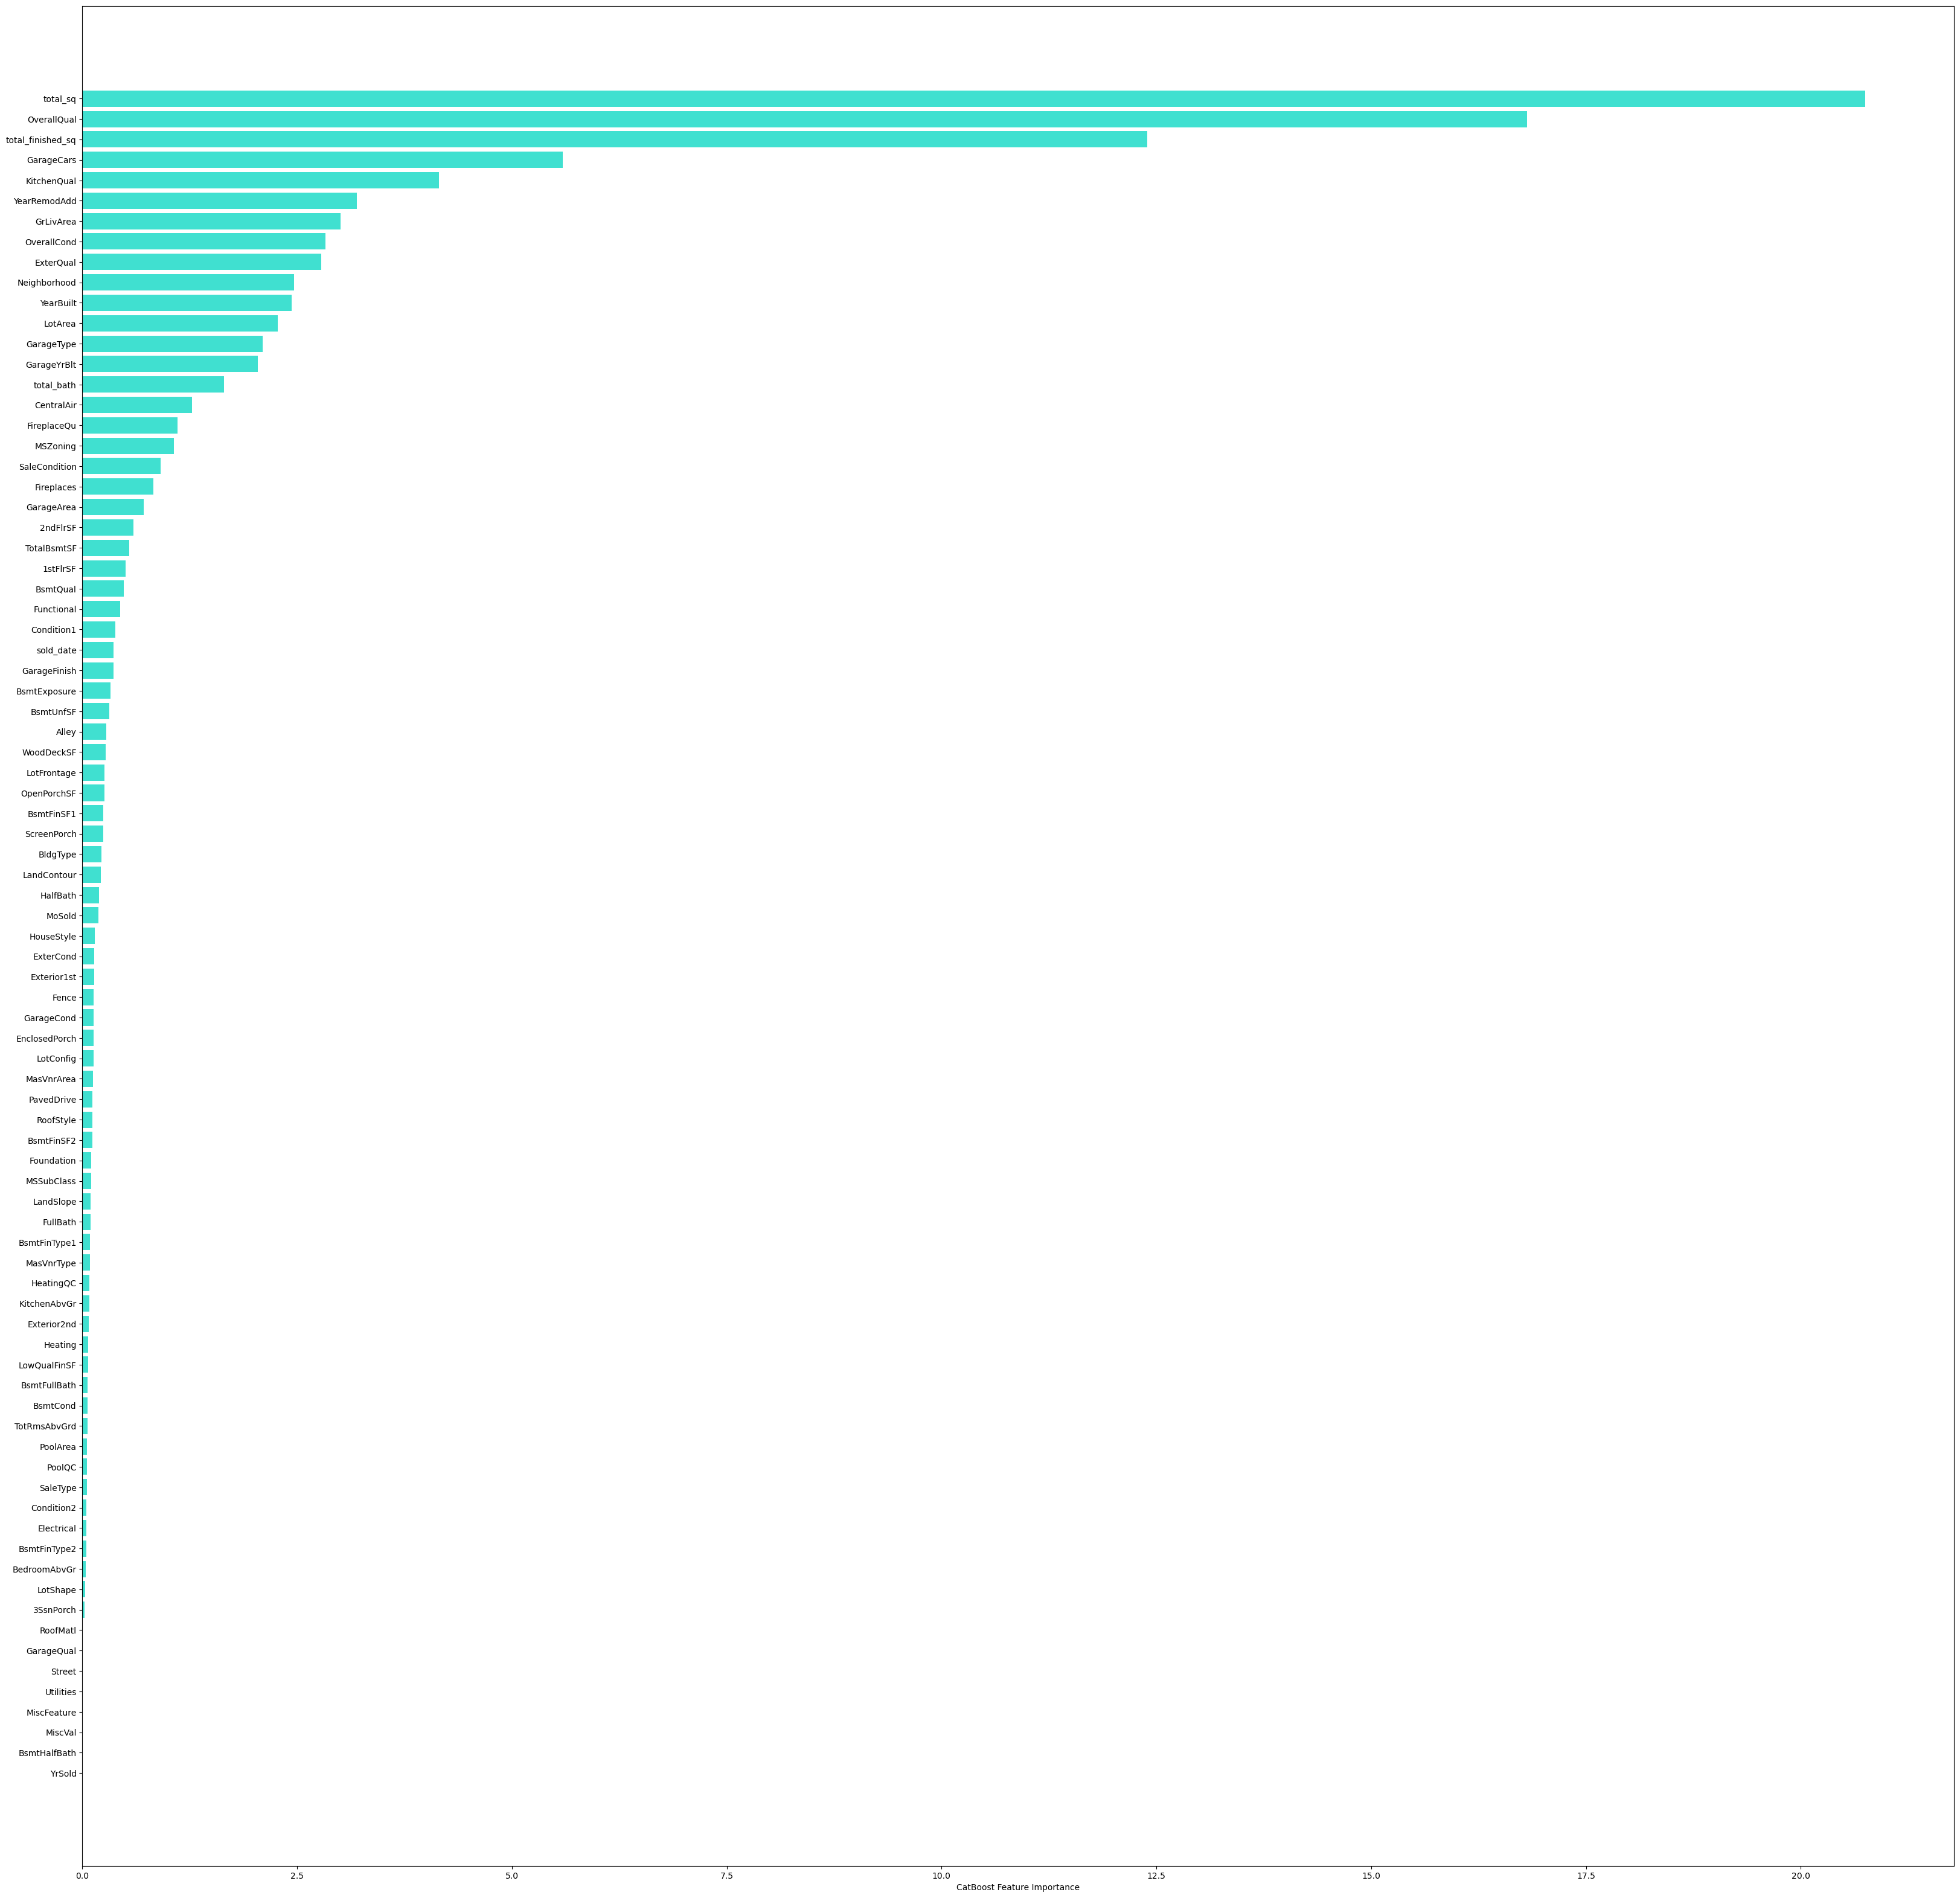

In [23]:
## Appears to have quite a bit of less useful features, but removing tends to make the model perform worse on test
sorted_feature_importance = model.feature_importances_.argsort()

plt.figure(figsize=(40,40))

plt.barh(X.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [19]:
# Submitting without removing any features
preds = model.predict(catboost_pool_test)

preds = np.expm1(preds)

pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_log_target_rs.csv',index=False)

# catboost_submission_log_target_gs.csv - Score: 0.12195
# With new features....0.12166
# catboost_submission_log_target_rs.csv Score: 0.1237

## Part 2b: Doing validation on just depth, as it has a large influence

In [ ]:
# Basic grid search to set optimized model parameters

model = CatBoostRegressor()

grid = {'iterations': [3000],
        'learning_rate': [0.03],
        'depth': [2,3,5,6,7,8,9,10],
        'l2_leaf_reg': [0.5]}

model.grid_search(grid, catboost_pool_train,plot=True)

In [ ]:
print(model.get_params())

In [ ]:
# Submitting with optimized depth

params = {'loss_function': 'RMSE', 'depth': 3, 'iterations': 6000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.5} # Updating iterations to 6000 to see if that helps

model = CatBoostRegressor(**params)

model.fit(catboost_pool_train)

preds = model.predict(catboost_pool_test)

preds = np.expm1(preds)

pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_log_target_gs_depth_opt_6000.csv',index=False)

# catboost_submission_log_target_gs_depth_opt.csv - Score: 0.12365
# catboost_submission_log_target_gs_depth_opt_6000.csv - Score: 0.1205

In [ ]:
# Last re-run of gridsearch with lower values for other params

model = CatBoostRegressor()

grid = {'iterations': [3000],
        'learning_rate': [0.01,0.03],
        'depth': [2,5],
        'l2_leaf_reg': [0.1,0.5]}

model.grid_search(grid, catboost_pool_train,plot=True)

In [ ]:
# Still the best model I can create so far
print(model.get_params())

In [ ]:
# Submitting with optimized depth

params = {'loss_function': 'RMSE', 'depth': 2, 'iterations': 6000, 'learning_rate': 0.01, 'l2_leaf_reg': 0.1}

model = CatBoostRegressor(**params)

model.fit(catboost_pool_train)

preds = model.predict(catboost_pool_test)

preds = np.expm1(preds)

pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_log_target_gs_depth_opt_6000_rerun.csv',index=False)

# catboost_submission_log_target_gs_depth_opt.csv - Score: 0.12229

## Part 3a: CatBoost model with ordinal value filling

In [ ]:
# Resetting our DFs
train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)

train_df = basic_filling(train)
test_df = basic_filling(test)

In [ ]:
# Used for testing mean prices tp map - Should this be median price?

var = 'Exterior2nd'

print(train_df.groupby(var).agg({'SalePrice':'median'}).sort_values(by='SalePrice',ascending=False))

print(mean_saleprice_map(train_df,var))

print(test_df[var].unique())

In [ ]:
train_df = mapped_values(train_df,train_df)
test_df = mapped_values(test_df,train_df)

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
# Train contains target variable
len(train_df.columns), len(test_df.columns)

In [ ]:
# Making a list, since there are a lot of columns that aren't visible otherwise
list(zip(test_df.isna().sum().index,test_df.isna().sum().values))

In [ ]:
# # Test has a few values not found in Train, so filling with 0
# test_df.fillna(0,inplace=True)

# train_df = impute_lot_frontage(train_df,'train')
# test_df = impute_lot_frontage(test_df,'test')

In [ ]:
# # Splitting Train data into train and validate
# from sklearn.model_selection import train_test_split

# X = train_df.drop('SalePrice',axis=1)
# y = np.log1p(train_df.SalePrice)

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=0)

# X_test = test_df

In [ ]:
# Something wrong with the full dataset column count?
test_df.head(3)

In [ ]:
from catboost import CatBoostRegressor, Pool

model = CatBoostRegressor(verbose=False)

# Setting my input and target data
X = train_df.drop('SalePrice',axis=1)
y = np.log1p(train_df.SalePrice) # Setting this to log10, since that is how scoring occurs

# Creating pool dataset to pass into catboost model
catboost_pool_train = Pool(X,y)
catboost_pool_test = Pool(test_df)

In [ ]:
grid = {'iterations': [500,1000],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 3, 5],
        'l2_leaf_reg': [0.1, 0.3]}

model.grid_search(grid, catboost_pool_train)

In [ ]:
print(model.get_params())

In [ ]:
# Submitting with optimized depth

params = {'loss_function': 'RMSE', 'depth': 2, 'iterations': 6000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.1} # Updating iterations to 6000 to see if that helps

model = CatBoostRegressor(**params)

model.fit(catboost_pool_train)

In [ ]:
preds = model.predict(catboost_pool_test)

preds = np.expm1(preds)

pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_num_feats.csv',index=False)

# catboost_submission_num_feats.csv - Score: 0.12802

## 3b: Scaling features

In [ ]:
def feature_transformation(df):
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
        
    # define min max scaler
    scaler = MinMaxScaler()
    # transform data
    final_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)
    
    final_df.index.names = ['Id']
    
    return final_df

In [ ]:
train_df.head()

In [ ]:
X = feature_transformation(X)

In [ ]:
X.head()

In [ ]:
test_df = feature_transformation(test_df)

In [ ]:
test_df.head()

In [ ]:
# Creating pool dataset to pass into catboost model
catboost_pool_train = Pool(X,y)
catboost_pool_test = Pool(test_df)

In [ ]:
# Submitting with optimized depth

params = {'loss_function': 'RMSE', 'depth': 2, 'iterations': 6000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.1} # Updating iterations to 6000 to see if that helps

model = CatBoostRegressor(**params)

model.fit(catboost_pool_train)

preds = model.predict(catboost_pool_test)

preds = np.expm1(preds)

pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_scaled_feats.csv',index=False)

# catboost_submission_scaled_feats.csv - Score: 0.14864

In [ ]:
# Re-training the aame model with more iterations
model = CatBoostRegressor(verbose=False,eval_metric='RMSE',depth=4,iterations=6000,learning_rate=0.1,l2_leaf_reg=0.5)

catboost_pool_all = Pool(X,y,cat_features=['Neighborhood'])

model.fit(catboost_pool_all)

## Part 4: Feature Reduction

In [13]:
# Re-creating the best dataset
train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)

train_df = basic_filling(train)
test_df = basic_filling(test)

# # Splitting Train data into train and validate

# Setting my input and target data
X = train_df.drop('SalePrice',axis=1)
y = np.log1p(train_df.SalePrice) # Setting this to log10, since that is how scoring occurs

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

X_test = test_df

catboost_pool_train = Pool(data=X_train,label=y_train,cat_features=cat_features)
catboost_pool_val = Pool(data=X_val,label=y_val,cat_features=cat_features)

catboost_pool_test = Pool(data=test_df,cat_features=cat_features)

In [14]:
value_tuples = []

for i in range(12,len(X_train.columns)):
    
    model = CatBoostRegressor(loss_function='RMSE',verbose=False,depth=5,learning_rate=0.03,l2_leaf_reg=0.5,\
                                      iterations=500)
    
    model.select_features(
    catboost_pool_train
    ,eval_set=catboost_pool_val
    ,features_for_select=list(X_train.columns)
    ,num_features_to_select=i
    ,steps=3
    ,algorithm='RecursiveByLossFunctionChange'
    ,shap_calc_type='Regular'
    ,logging_level='Silent'
    ,train_final_model=True
    )
    
    train_preds = model.predict(catboost_pool_train)
    test_preds = model.predict(catboost_pool_val)
    
    rms_train = (mean_squared_error(np.log10(y_train), np.log10(train_preds), squared=True))**0.5
    
    rms_val = (mean_squared_error(np.log10(y_val), np.log10(test_preds), squared=True))**0.5
    
    print('Currently at step: ',i)
    
    value_tuples.append((i,rms_train,rms_val))


Currently at step:  12
Currently at step:  13
Currently at step:  14
Currently at step:  15
Currently at step:  16
Currently at step:  17
Currently at step:  18
Currently at step:  19
Currently at step:  20
Currently at step:  21
Currently at step:  22
Currently at step:  23
Currently at step:  24
Currently at step:  25
Currently at step:  26
Currently at step:  27
Currently at step:  28
Currently at step:  29
Currently at step:  30
Currently at step:  31
Currently at step:  32
Currently at step:  33
Currently at step:  34
Currently at step:  35
Currently at step:  36
Currently at step:  37
Currently at step:  38
Currently at step:  39
Currently at step:  40
Currently at step:  41
Currently at step:  42
Currently at step:  43
Currently at step:  44
Currently at step:  45
Currently at step:  46
Currently at step:  47
Currently at step:  48
Currently at step:  49
Currently at step:  50
Currently at step:  51
Currently at step:  52
Currently at step:  53
Currently at step:  54
Currently a

The number of features selection steps (3) is greater than the number of features to eliminate (2). The number of steps was reduced to 2.


Currently at step:  81


The number of features selection steps (3) is greater than the number of features to eliminate (1). The number of steps was reduced to 1.


Currently at step:  82


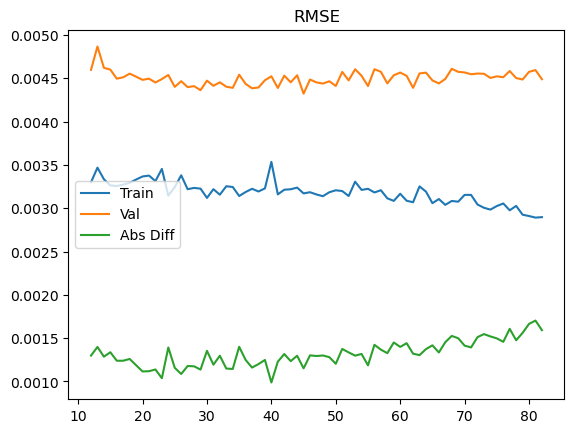

In [16]:
plt.plot([i[0] for i in value_tuples],[i[1] for i in value_tuples],label='Train')

plt.plot([i[0] for i in value_tuples],[i[2] for i in value_tuples],label='Val')

plt.plot([i[0] for i in value_tuples],[abs(i[2]-i[1]) for i in value_tuples],label='Abs Diff')

plt.title("RMSE")
plt.legend()

plt.show()

In [17]:
# Getting ideal number of features from the best validation RMSE
val_score = list(zip([i[0] for i in value_tuples],[i[2] for i in value_tuples]))

min(val_score, key = lambda t: t[1])

(45, 0.004323142449482684)

In [18]:
## Removing unimportant features, based on RSME analysis above

model = CatBoostRegressor(loss_function='RMSE',verbose=False,depth=5,learning_rate=0.03,l2_leaf_reg=0.5,\
                                      iterations=3000)

model.select_features(
    catboost_pool_train
    ,eval_set=catboost_pool_val
    ,features_for_select=list(X_train.columns)
    ,num_features_to_select=45
    ,steps=6
    ,algorithm='RecursiveByLossFunctionChange'
    ,shap_calc_type='Regular'
    ,logging_level='Silent'
    ,train_final_model=True
    )

{'selected_features': [0,
  1,
  4,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  24,
  28,
  29,
  31,
  32,
  34,
  35,
  36,
  38,
  39,
  43,
  47,
  49,
  50,
  51,
  52,
  54,
  56,
  57,
  60,
  61,
  67,
  68,
  69,
  70,
  73,
  76,
  78,
  80,
  81],
 'eliminated_features_names': ['GrLivArea',
  'LotFrontage',
  'LotArea',
  'total_bath',
  '1stFlrSF',
  'TotalBsmtSF',
  'YearRemodAdd',
  'FullBath',
  'BsmtFullBath',
  'PoolQC',
  'TotRmsAbvGrd',
  'MoSold',
  'Fireplaces',
  'MasVnrArea',
  'GarageYrBlt',
  'GarageFinish',
  'OpenPorchSF',
  'WoodDeckSF',
  'ExterQual',
  'LotShape',
  'CentralAir',
  'Exterior1st',
  'GarageCond',
  'Fence',
  'Alley',
  'BsmtFinSF1',
  'Exterior2nd',
  'RoofMatl',
  'LowQualFinSF',
  'ExterCond',
  'SaleType',
  'MiscVal',
  'BsmtCond',
  'GarageQual',
  'PavedDrive',
  'RoofStyle',
  'sold_date',
  'Electrical'],
 'loss_graph': {'main_indices': [0, 8, 15, 22, 28, 33, 38],
  'removed_features_count': [0,
   1,
   

In [19]:
# Submitting with 38 features: 0.12949, with 55 features: 0.13133, with 55 features and depth of 15: 0.17472
preds = model.predict(catboost_pool_test)

preds = np.expm1(preds)

In [20]:
pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_feat_red.csv',index=False)

# catboost_submission_feat_red.csv - Score: 0.13112
# catboost_submission_feat_red.csv - Score: 0.12495 - with new features

In [25]:
## Part 4b: Re-train with all train samples and 6000 iterations
selected_features_names = ['MSSubClass',
  'MSZoning',
  'Street',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'MasVnrType',
  'Foundation',
  'BsmtQual',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'Heating',
  'HeatingQC',
  '2ndFlrSF',
  'BsmtHalfBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageCars',
  'GarageArea',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscFeature',
  'YrSold',
  'SaleCondition',
  'total_sq',
  'total_finished_sq']

train_df_red = train_df[selected_features_names]
test_df_red = train_df[selected_features_names]


In [26]:
cat_features = list(train_df_red.dtypes[train.dtypes==object].index)

cat_features.append('MSSubClass')

cat_features

['MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'MiscFeature',
 'SaleCondition',
 'MSSubClass']

In [27]:
catboost_pool_train = Pool(data=X[selected_features_names],label=y,cat_features=cat_features)

catboost_pool_test = Pool(data=test_df[selected_features_names],cat_features=cat_features)

In [28]:
model = CatBoostRegressor(loss_function='RMSE',verbose=False,depth=5,learning_rate=0.03,l2_leaf_reg=0.5,\
                                      iterations=6000)

model.fit(catboost_pool_train)

preds = model.predict(catboost_pool_test)

preds = np.expm1(preds)

pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_feat_red_full.csv',index=False)

# catboost_submission_feat_red_full.csv - Score: 0.13268
# catboost_submission_feat_red_full.csv - Score: 0.12431 - with new features

<Axes: xlabel='Feature Id'>

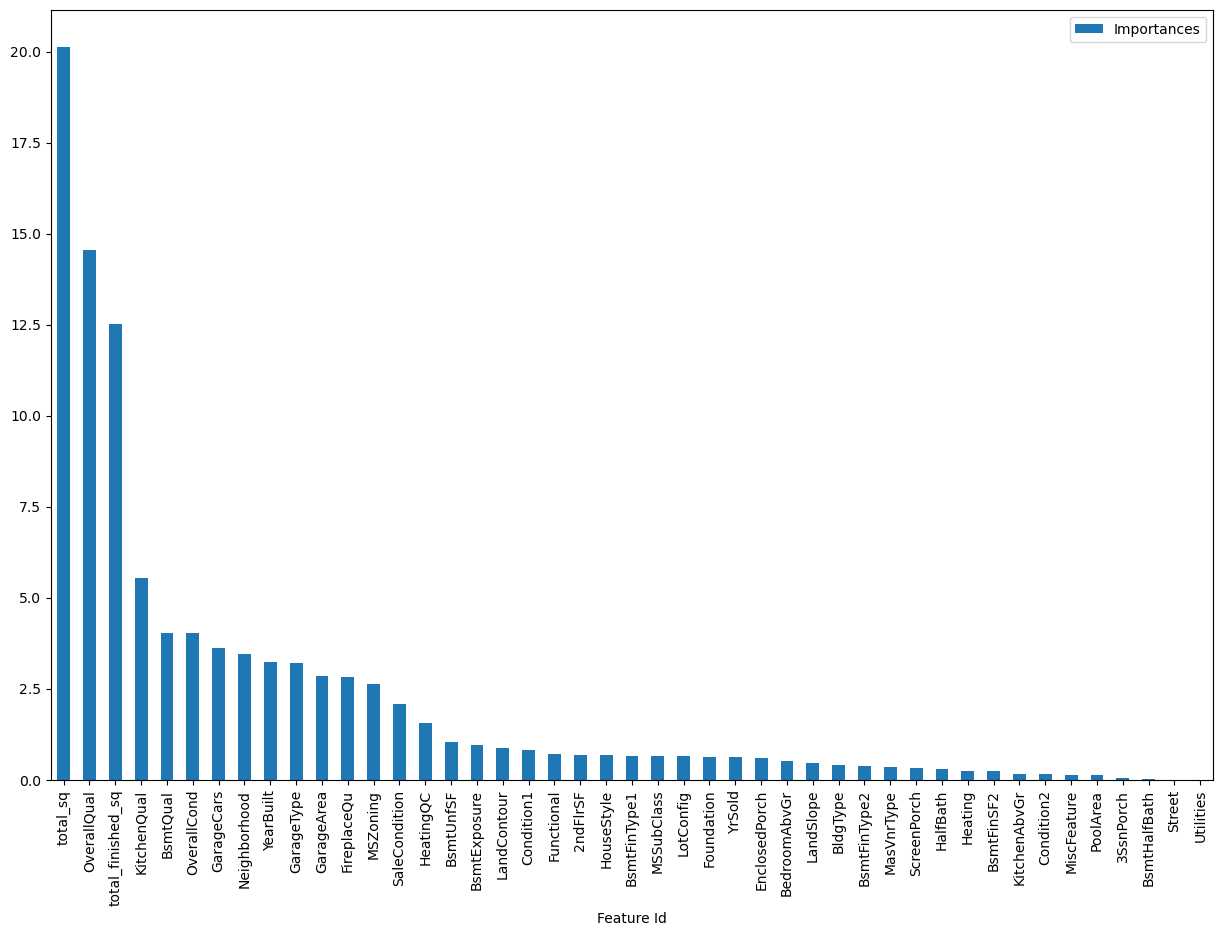

In [29]:
model.get_feature_importance(prettified=True).set_index('Feature Id').plot(kind='bar',figsize=(15,10))


## Scrap

In [ ]:
# Validating fit

train_preds = model.predict(catboost_pool_train)

In [ ]:
from sklearn.metrics import mean_squared_error

rms = (mean_squared_error(np.log10(train.SalePrice), np.log10(train_preds), squared=True))**0.5

print(rms)

In [ ]:
model = CatBoostRegressor(verbose=False)

# Define the number of folds for cross-validation
num_folds = 5

# Create a KFold object to split the data into folds
kf = KFold(n_splits=num_folds, shuffle=True)

# Perform cross-validation
scores = cross_val_score(model, catboost_pool_train, cv=kf, scoring='neg_mean_squared_error')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = -scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the scores
print('Mean squared error:', mean_score)
print('Standard deviation:', std_score)

In [ ]:
model.plot_tree(
    tree_idx=0,
    pool=catboost_pool_train, 
)

In [ ]:
model.get_feature_importance(prettified=True).set_index('Feature Id')

In [ ]:
model.get_feature_importance(prettified=True).set_index('Feature Id').plot(kind='bar',figsize=(15,10))